<h1 dir="rtl" align="right">
90004 למידת מכונה - עבודה מספר 1
</h1>


<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    נדב פיירמן שטרן 
    <br><br>
    207018250
</h3>

<h2 dir="rtl" align="right">
חלק א': הורדת הנתונים וטעינה
</h2>

<h3 dir="rtl" align="right">
טעינת הסיפריות
</h3>

In [5]:
import math
import random
import time
import warnings
import joblib

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import randint, uniform
from sklearn.utils.class_weight import compute_sample_weight

import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn import preprocessing
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder, PolynomialFeatures, MultiLabelBinarizer)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import (LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import (GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier)
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

from sklearn.multioutput import MultiOutputClassifier, MultiOutputRegressor

from sklearn.model_selection import (KFold, StratifiedKFold, LeaveOneOut, train_test_split, cross_val_score, cross_val_predict,
    GridSearchCV, RandomizedSearchCV)

from sklearn.metrics import (r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, explained_variance_score,
    accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, multilabel_confusion_matrix,
    hamming_loss, roc_curve, auc, roc_auc_score, precision_recall_curve)

from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

warnings.filterwarnings('ignore')
pd.set_option('future.no_silent_downcasting', True)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x)
plt.style.use("ggplot")
%matplotlib inline
shap.initjs()

<h3 dir="rtl" align="right">
טעינה של הנתונים
</h3>

In [7]:
try:
    df = pd.read_csv("car_prices_dataset.csv")
    print("Loaded")
except:
    print("Error")

Loaded


In [8]:
df.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color
0,Mazda,2,2005,Manual,Hybrid,Black,1968.5513,246331.2868,2.9747,159.0402,4.1251,4000.0000,4800.0000,Black
1,Skoda,Kodiaq,2023,Automatic,Hybrid,Red,1792.7052,146456.8077,4.0217,117.8771,5.3356,7000.2454,8400.2945,Red
2,Kia,Picanto,2017,Manual,Diesel,Red,NaN,253564.8520,0.9177,80.7781,5.6373,4000.0000,4800.0000,Red
3,Skoda,Octavia,2017,Manual,NaN,Red,1375.1347,165005.4552,1.0639,201.8089,8.0920,5550.6723,6660.8067,Red
4,Skoda,Octavia,2008,Manual,NaN,Silver,NaN,75019.2847,1.9873,143.4297,3.0100,4000.0000,4800.0000,Silver


<h3 dir="rtl" align="right">
הוספת מזהה רץ (ID)
</h3>

In [10]:
df['id'] = range(len(df))

In [11]:
len(df['id'].unique())

400

In [12]:
df.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
0,Mazda,2,2005,Manual,Hybrid,Black,1968.5513,246331.2868,2.9747,159.0402,4.1251,4000.0000,4800.0000,Black,0
1,Skoda,Kodiaq,2023,Automatic,Hybrid,Red,1792.7052,146456.8077,4.0217,117.8771,5.3356,7000.2454,8400.2945,Red,1
2,Kia,Picanto,2017,Manual,Diesel,Red,NaN,253564.8520,0.9177,80.7781,5.6373,4000.0000,4800.0000,Red,2
3,Skoda,Octavia,2017,Manual,NaN,Red,1375.1347,165005.4552,1.0639,201.8089,8.0920,5550.6723,6660.8067,Red,3
4,Skoda,Octavia,2008,Manual,NaN,Silver,NaN,75019.2847,1.9873,143.4297,3.0100,4000.0000,4800.0000,Silver,4


<h3 dir="rtl" align="right">
    חלוקת הנתונים (Train, Validation, Test)
</h3>

In [14]:
def train_val_test_split(data, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    train_set, temp_set = train_test_split(data, test_size=(val_size + test_size), random_state=random_state)
    val_set, test_set = train_test_split(temp_set, test_size=test_size/(val_size + test_size), random_state=random_state)
    return train_set, val_set, test_set

In [15]:
train_set, val_set, test_set = train_val_test_split(df)

In [16]:
train_set.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
157,Kia,Sportage,2012,Automatic,NaN,Black,1204.0645,95464.3708,2.9906,144.1066,5.5434,4000.0000,4800.0000,Black,157
109,Kia,Ceed,2019,NaN,Diesel,Red,1999.2412,232160.0081,1.9453,94.0483,9.3797,4000.0000,4800.0000,Red,109
17,Honda,Jazz,2009,Manual,Diesel,Black,1796.1377,204429.2206,2.0213,153.8619,4.1682,4000.0000,4800.0000,Black,17
347,Mazda,3,2013,Automatic,Hybrid,NaN,1223.1397,193242.5040,2.1027,131.1258,3.8490,4000.0000,4800.0000,White,347
24,Honda,Jazz,2006,Automatic,Gasoline,White,1190.9343,19805.1127,1.9449,216.4839,3.9048,4000.0000,4800.0000,White,24


In [17]:
print(f"Train Set: {train_set.shape}")
print(f"Val Set:   {val_set.shape}")
print(f"Test Set:  {test_set.shape}")

Train Set: (280, 15)
Val Set:   (60, 15)
Test Set:  (60, 15)


<h2 dir="rtl" align="right">
חלק ב': EDA (ניתוח נתונים ומיצוי מאפיינים)
</h2>

<h3 dir="rtl" align="right">
* בדיקת הקורלציות תעשה לאחר העיבוד המקדים בחלק ג'
</h3>


<h3 dir="rtl" align="right">
אנליזה של המאפיינים - סוג וערכים חסרים
</h3>

In [21]:
def check_df(df):
    print(f"Dataset Shape: {df.shape}")
    
    rows_with_null = df.isna().any(axis=1).sum()
    print(f"Total rows with at least one NULL: {rows_with_null}")
    
    summary = pd.DataFrame({'Dtype': df.dtypes, 'Non-Null Count': df.count(), 'Null Count': df.isna().sum(),          
        'Null Percent': (df.isna().sum() / len(df) * 100).round(2), 'Unique': df.nunique()})
    
    return summary

<h3 dir="rtl" align="right">
אנליזה של המאפיינים - מדדים סטטיסטיים
</h3>

In [23]:
check_df(train_set)

Dataset Shape: (280, 15)
Total rows with at least one NULL: 154


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,object,270,10,3.5700,6
model,object,267,13,4.6400,18
year,int64,280,0,0.0000,19
transmission,object,264,16,5.7100,2
fuel_type,object,266,14,5.0000,3
color,object,266,14,5.0000,7
engine_cc,float64,259,21,7.5000,258
mileage_km,float64,247,33,11.7900,244
owners,float64,265,15,5.3600,265
horsepower,float64,250,30,10.7100,248


In [24]:
train_set.describe().round(2)

,year,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,id
count,280.0000,259.0000,247.0000,265.0000,250.0000,255.0000,251.0000,251.0000,280.0000
mean,2013.9600,1820.1400,163186.6500,2.4300,147.3600,6.2900,6670.1900,8004.2300,202.9300
std,5.5400,827.2600,167088.4000,1.1100,59.6000,1.9000,11246.8100,13496.1700,111.9900
min,2005.0000,1132.1400,10419.6500,0.8900,-200.0000,2.8300,50.0000,60.0000,1.0000
25%,2009.0000,1406.6100,82149.2300,1.0900,115.8400,4.6400,4000.0000,4800.0000,110.5000
50%,2014.0000,1780.1900,148200.8200,2.0700,152.7300,6.4000,4000.0000,4800.0000,202.0000
75%,2019.0000,2007.4600,215281.9900,3.0700,189.9900,7.9900,6195.6300,7434.7600,302.2500
max,2023.0000,10000.0000,1330633.4800,4.1400,228.4700,9.5700,105225.7500,126270.9000,399.0000


<h3 dir="rtl" align="right">
תצוגה ויזואלית של התפלגות כל מאפיין
</h3>

In [26]:
def graph_stats(df, exclude_cols=None, n_cols=3, cat_threshold=20):
    import math
    
    cols = [c for c in df.columns 
            if (exclude_cols is None or c not in exclude_cols) 
            and 'id' not in c.lower()]
    
    n_rows = math.ceil(len(cols) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]

    for i, col in enumerate(cols):
        ax = axes[i]
        unique_count = df[col].nunique()
        is_numeric = pd.api.types.is_numeric_dtype(df[col])

        if not is_numeric or unique_count <= cat_threshold:
            data = df[col].value_counts().sort_index()
            sns.barplot(x=data.index, y=data.values, ax=ax, palette="Blues_d", hue=data.index, legend=False)
            ax.set_title(f"{col}")
        
        else:
            sns.histplot(df[col].dropna(), kde=True, ax=ax, color='#82B1C6', bins=unique_count if unique_count < 50 else 30, element="bars")
            ax.set_title(f"{col}")

        ax.set_ylabel('Count')
        ax.set_xlabel('')

        ax.tick_params(axis='x', which='both', bottom=True, labelbottom=True)
        
        if unique_count > 5:
            ax.tick_params(axis='x', rotation=45)

        ax.grid(axis='y', alpha=0.2, linestyle='--')

    for j in range(len(cols), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

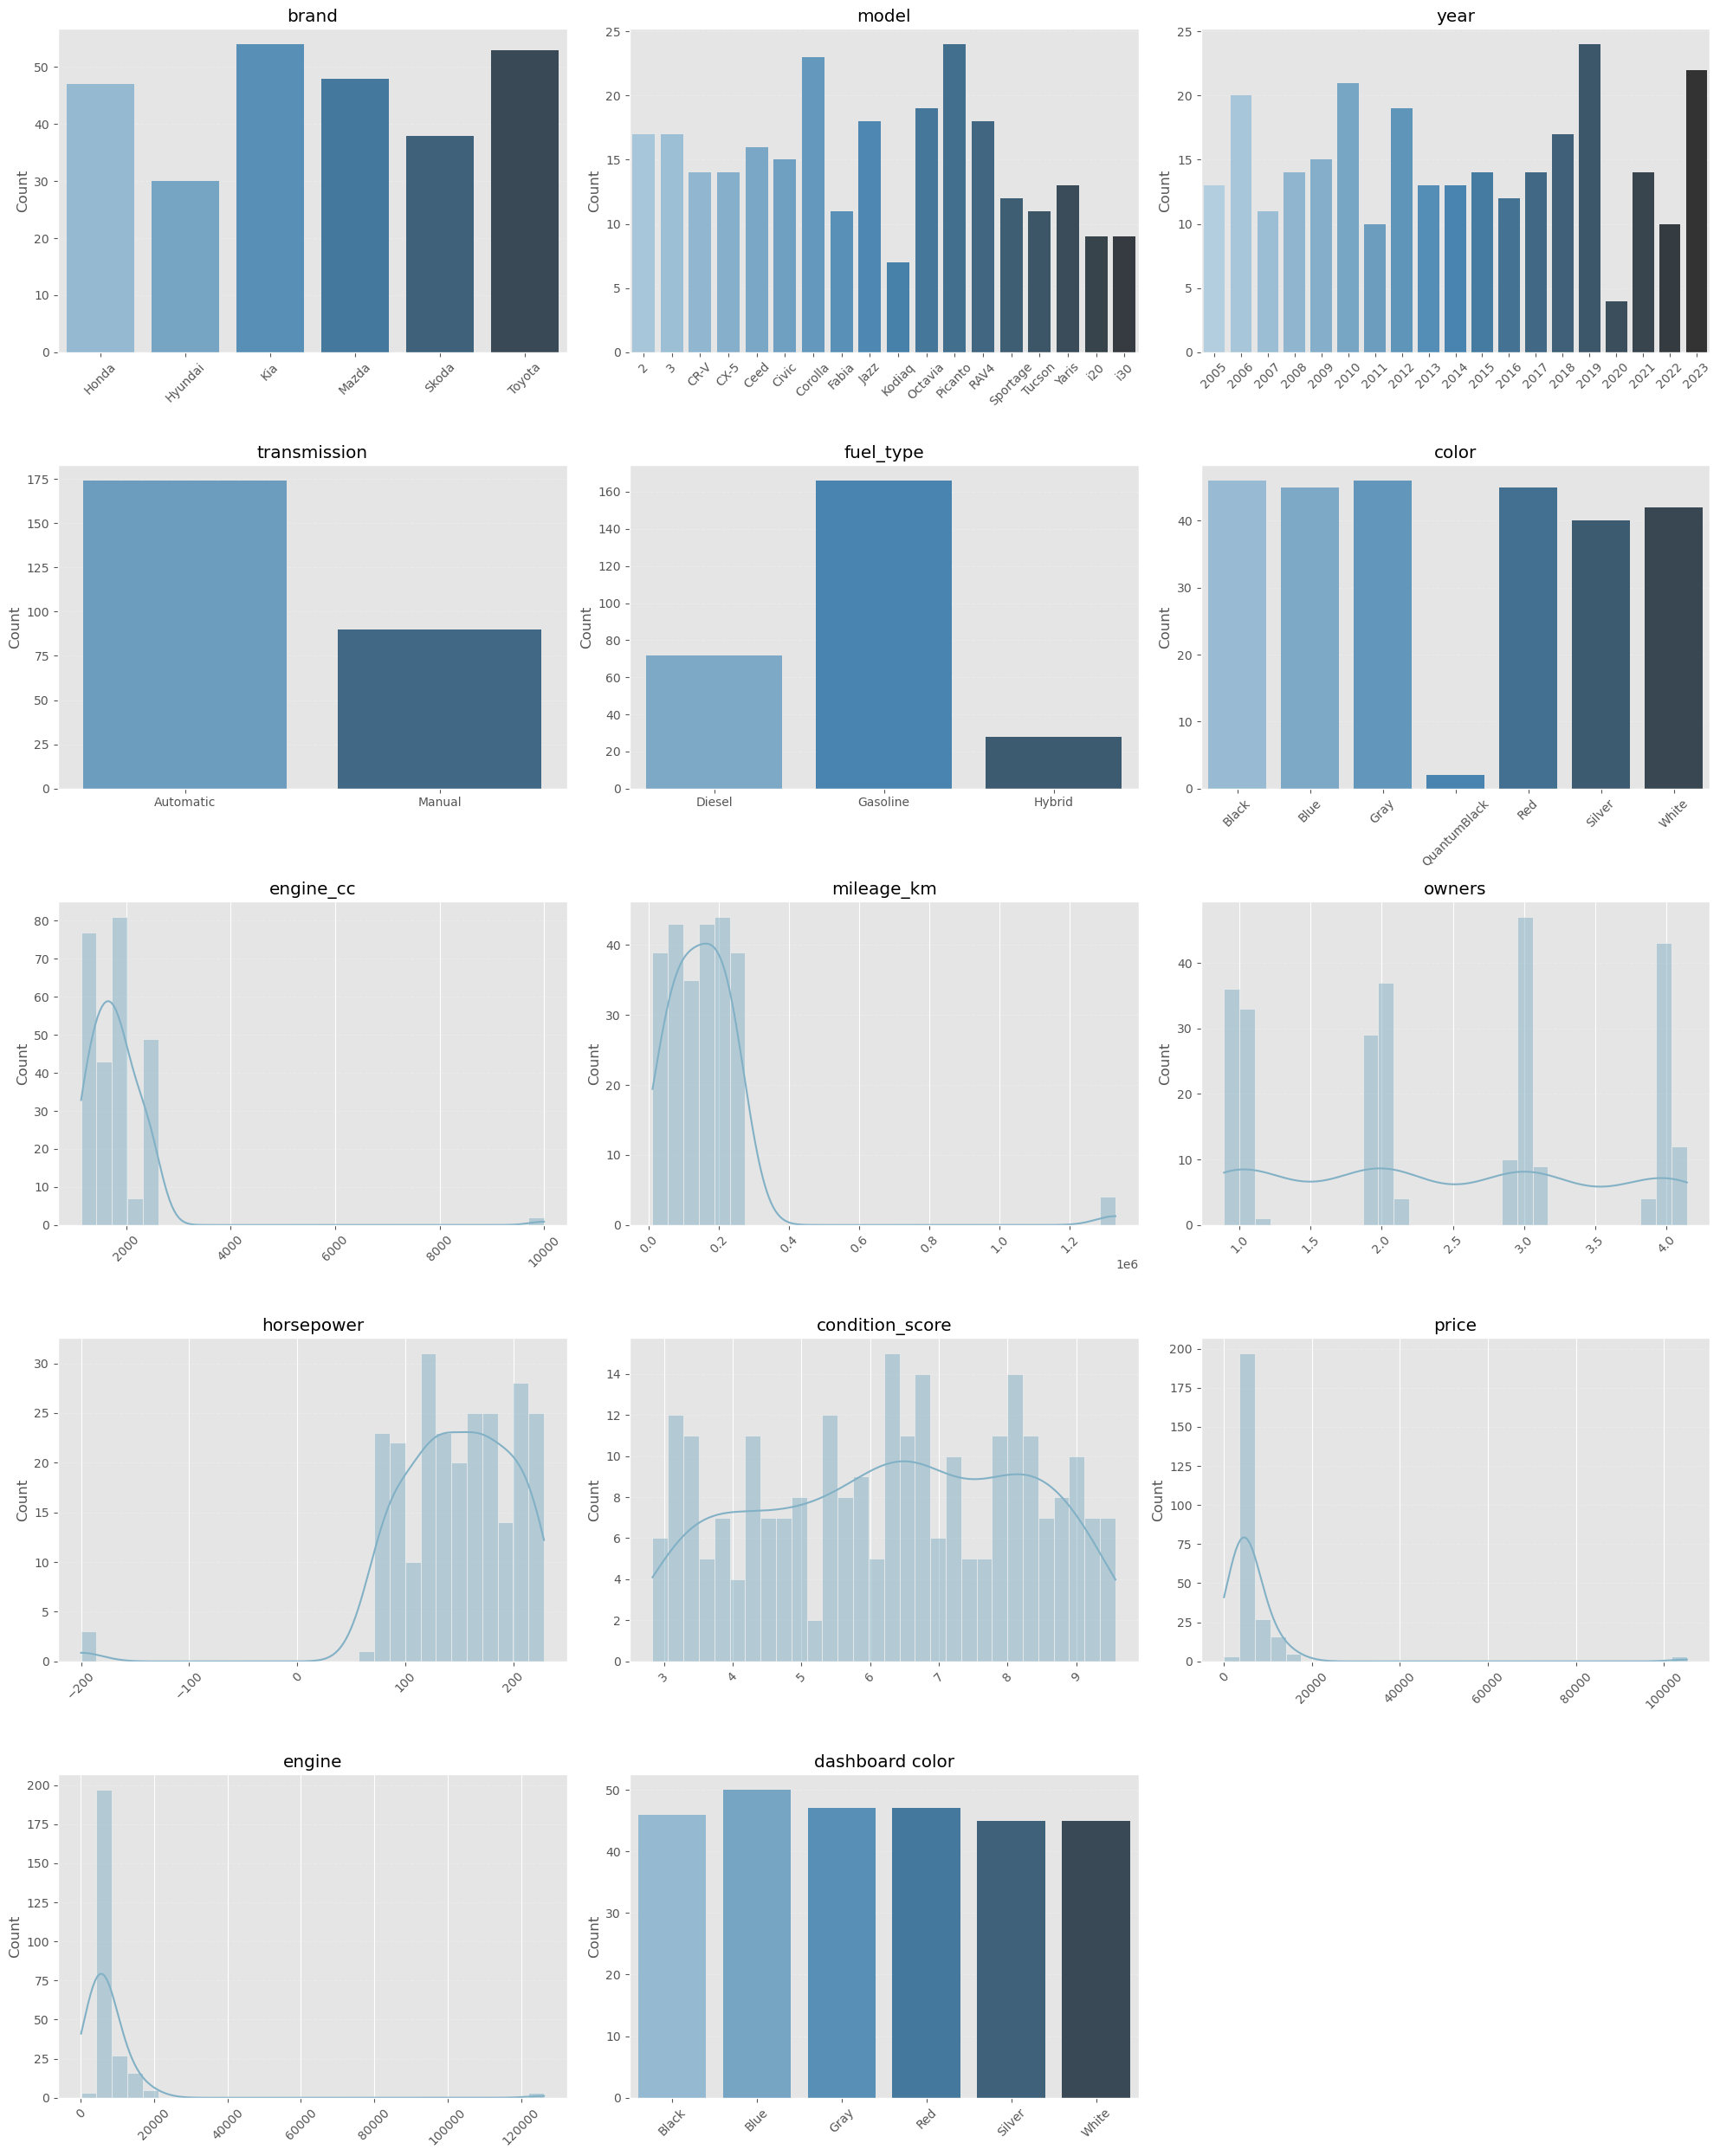

In [27]:
graph_stats(train_set)

<h2 dir="rtl" align="right">
חלק ג': עיבוד מקדים (Pre-Processing)
</h2>

<h3 dir="rtl" align="right">
מחיקת ערכים קטנים או שווים ל 0
</h3>

In [30]:
def replace_negative_with_nan(df):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns 
    for col in numeric_cols: 
        df.loc[df[col] <= 0, col] = np.nan
    return df

In [31]:
train_set = replace_negative_with_nan(train_set)
val_set = replace_negative_with_nan(val_set)
test_set = replace_negative_with_nan(test_set)

<h3 dir="rtl" align="right">
עיגול לערכים שלמים
</h3>

In [33]:
def float_column_to_int(train_df, val_df, test_df, columns_to_fix, custom_rules=None):
    train_df, val_df, test_df = train_df.copy(), val_df.copy(), test_df.copy()
    rules = custom_rules or {}
    
    for col in columns_to_fix:
        round_base = rules.get(col, 1)
        
        for df in [train_df, val_df, test_df]:
            if col in df.columns:
                df[col] = ((df[col] / round_base).round() * round_base).astype('Int64')
                
    return train_df, val_df, test_df

In [34]:
cols = ['id', 'engine', 'price', 'horsepower', 'owners', 'mileage_km', 'engine_cc']
train_set, val_set, test_set = float_column_to_int(train_set, val_set, test_set, cols)

<h3 dir="rtl" align="right">
מחיקת ערכים שכיחים למניעת הטיית המודל
</h3>

In [36]:
def replace_dominant_values_with_nan(train_df, val_df, test_df, threshold=0.50):
    train_df = train_df.copy()
    val_df = val_df.copy()
    test_df = test_df.copy()
    
    numeric_cols = train_df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        value_counts = train_df[col].value_counts(dropna=False)
        if len(value_counts) > 0:
            most_common_value = value_counts.index[0]
            most_common_freq = value_counts.iloc[0] / len(train_df)
            
            if most_common_freq > threshold:
                train_df.loc[train_df[col] == most_common_value, col] = np.nan
                val_df.loc[val_df[col] == most_common_value, col] = np.nan
                test_df.loc[test_df[col] == most_common_value, col] = np.nan
    
    return train_df, val_df, test_df

In [37]:
train_set, val_set, test_set = replace_dominant_values_with_nan(train_set, val_set, test_set, threshold=0.50)

<h3 dir="rtl" align="right">
איחוד קטגוריות זהות QuantumBlack=Black
</h3>

In [39]:
train_set['color'] = train_set['color'].replace('QuantumBlack', 'Black')
val_set['color'] = val_set['color'].replace('QuantumBlack', 'Black')
test_set['color'] = test_set['color'].replace('QuantumBlack', 'Black')

<h3 dir="rtl" align="right">
ניקוי ערכים חריגים (מעל 3 סטיות תקן)
</h3>

In [41]:
def remove_outliers_by_train(train_df, val_df, test_df, n_std=3):
    train_df = train_df.copy()
    val_df = val_df.copy()
    test_df = test_df.copy()
    
    cols = ['engine_cc', 'mileage_km', 'owners', 'horsepower', 'condition_score', 'price', 'engine']
    
    for col in cols:
        mean_val = train_df[col].mean()
        std_val = train_df[col].std()
        
        lower_bound = mean_val - n_std * std_val
        upper_bound = mean_val + n_std * std_val
        
        train_df.loc[(train_df[col] < lower_bound) | (train_df[col] > upper_bound), col] = np.nan
        val_df.loc[(val_df[col] < lower_bound) | (val_df[col] > upper_bound), col] = np.nan
        test_df.loc[(test_df[col] < lower_bound) | (test_df[col] > upper_bound), col] = np.nan
    
    return train_df, val_df, test_df

In [42]:
train_set, val_set, test_set = remove_outliers_by_train(train_set, val_set, test_set, n_std=3)

<h3 dir="rtl" align="right">
בחינה ויזואלית חוזרת של התפלגות הנתונים לאחר העיבוד המקדים
</h3>

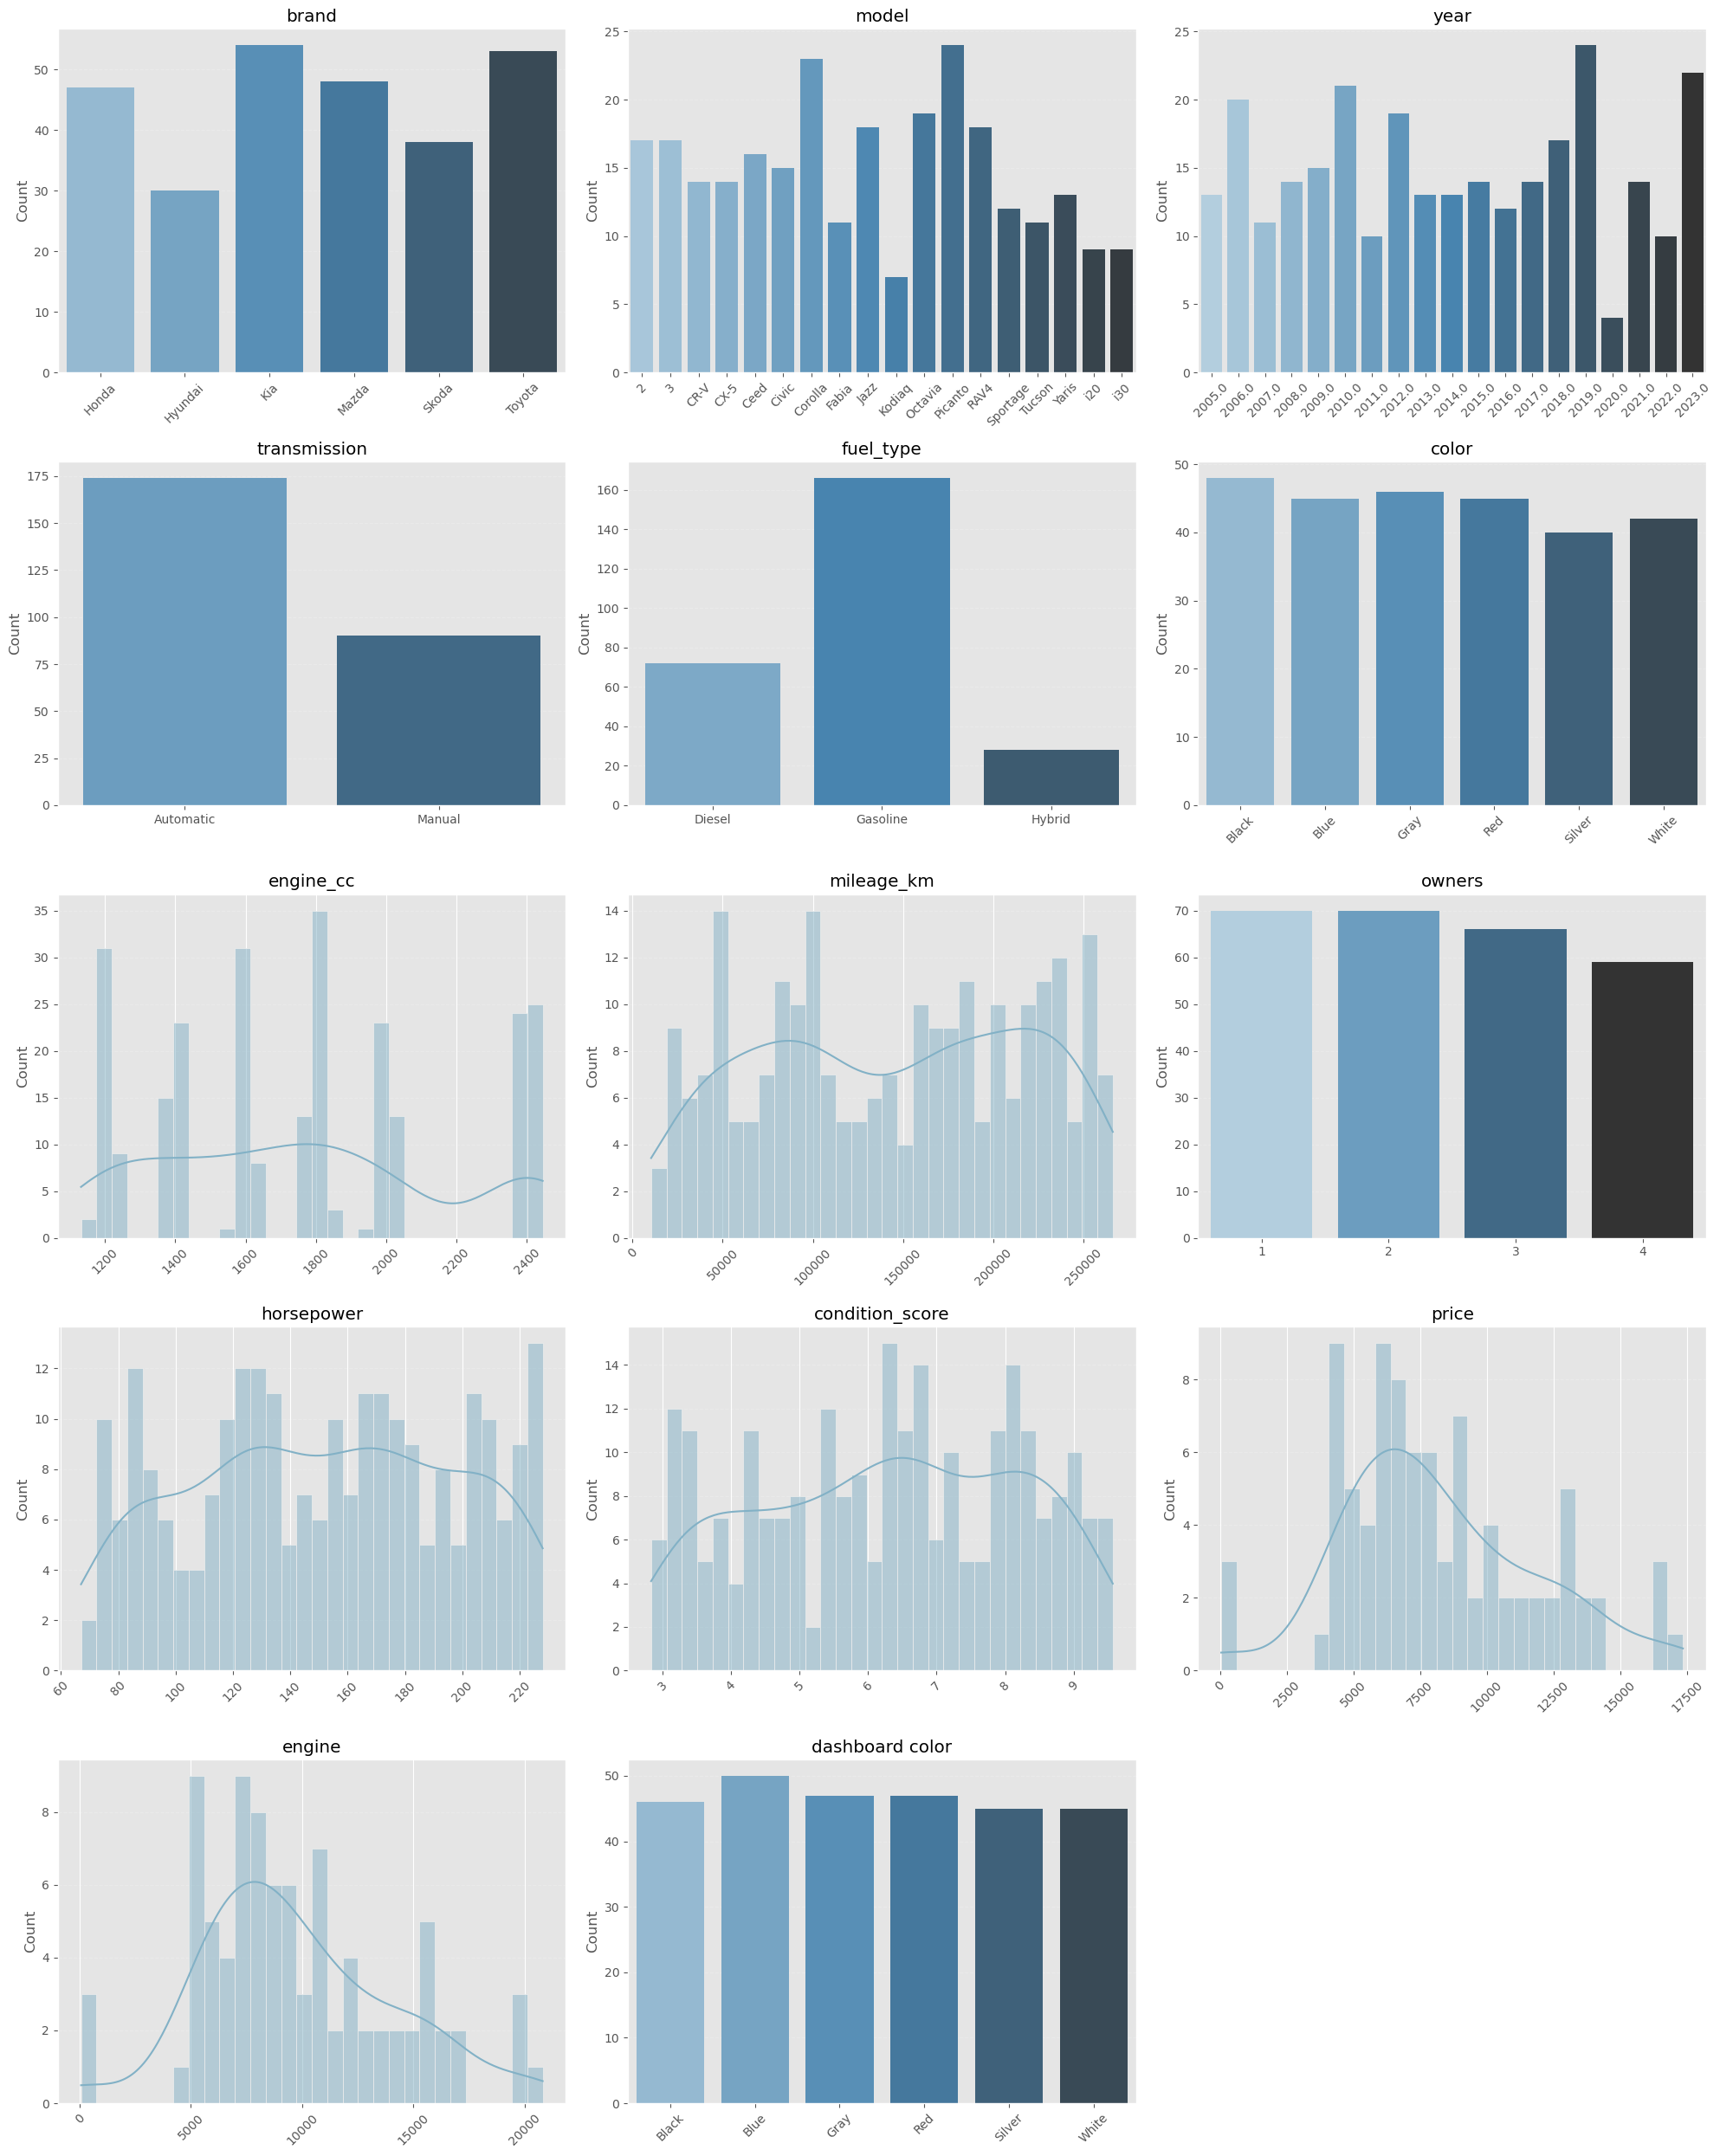

In [44]:
graph_stats(train_set)

<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    מסקנות מהניתוח הוויזואלי
    <br><br>
    1.במחיר ובמנוע אותרו ערכים חריגים נוספים שנדרש לנקות
    <br><br>
    2. נדרש לאחד את כוחות סוס וציון מצב הרכב לקטגוריות
</div>


<h3 dir="rtl" align="right">
ניקוי ערכים חריגים נוספים 
</h3>

In [47]:
def replace_low_values_with_nan(train_df, val_df, test_df, cols, threshold=100):
    train_df = train_df.copy()
    val_df = val_df.copy()
    test_df = test_df.copy()
    
    for col in cols:
        train_df.loc[train_df[col] <= threshold, col] = np.nan
        val_df.loc[val_df[col] <= threshold, col] = np.nan
        test_df.loc[test_df[col] <= threshold, col] = np.nan
    
    return train_df, val_df, test_df

In [48]:
train_set, val_set, test_set = replace_low_values_with_nan(train_set, val_set, test_set, cols=['price', 'engine'], threshold=100)

<h3 dir="rtl" align="right">
איחוד כוחות סוס לקטגוריות
</h3>

In [50]:
train_set, val_set, test_set = float_column_to_int(train_set, val_set, test_set, columns_to_fix=['engine_cc'], 
                                                         custom_rules={'engine_cc': 200})

<h3 dir="rtl" align="right">
איחוד ציון מצב הרכב לקטגוריות (עיגול למספרים שלמים)
</h3>

In [52]:
train_set, val_set, test_set = float_column_to_int(train_set, val_set, test_set, columns_to_fix=['condition_score'])

<h3 dir="rtl" align="right">
בחינה ויזואלית חוזרת של התפלגות הנתונים לאחר עיבודים נוספים
</h3>

In [54]:
check_df(train_set)

Dataset Shape: (280, 15)
Total rows with at least one NULL: 247


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,object,270,10,3.5700,6
model,object,267,13,4.6400,18
year,float64,280,0,0.0000,19
transmission,object,264,16,5.7100,2
fuel_type,object,266,14,5.0000,3
color,object,266,14,5.0000,6
engine_cc,Int64,257,23,8.2100,6
mileage_km,Int64,243,37,13.2100,242
owners,Int64,265,15,5.3600,4
horsepower,Int64,247,33,11.7900,124


In [55]:
train_set.describe().round(2)

,year,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,id
count,280.0000,257.0000,243.0000,265.0000,247.0000,255.0000,85.0000,85.0000,280.0000
mean,2013.9600,1754.8600,143969.4200,2.4300,151.5700,6.2600,8451.6800,10141.9900,202.9300
std,5.5400,402.1300,74036.2600,1.1100,45.8800,1.9500,3347.0900,4016.5100,111.9900
min,2005.0000,1200.0000,10420.0000,1.0000,67.0000,3.0000,4046.0000,4856.0000,1.0000
25%,2009.0000,1400.0000,81178.0000,1.0000,117.0000,5.0000,6002.0000,7202.0000,110.5000
50%,2014.0000,1800.0000,146996.0000,2.0000,154.0000,6.0000,7594.0000,9113.0000,202.0000
75%,2019.0000,2000.0000,212647.0000,3.0000,190.5000,8.0000,10381.0000,12458.0000,302.2500
max,2023.0000,2400.0000,266127.0000,4.0000,228.0000,10.0000,17349.0000,20819.0000,399.0000


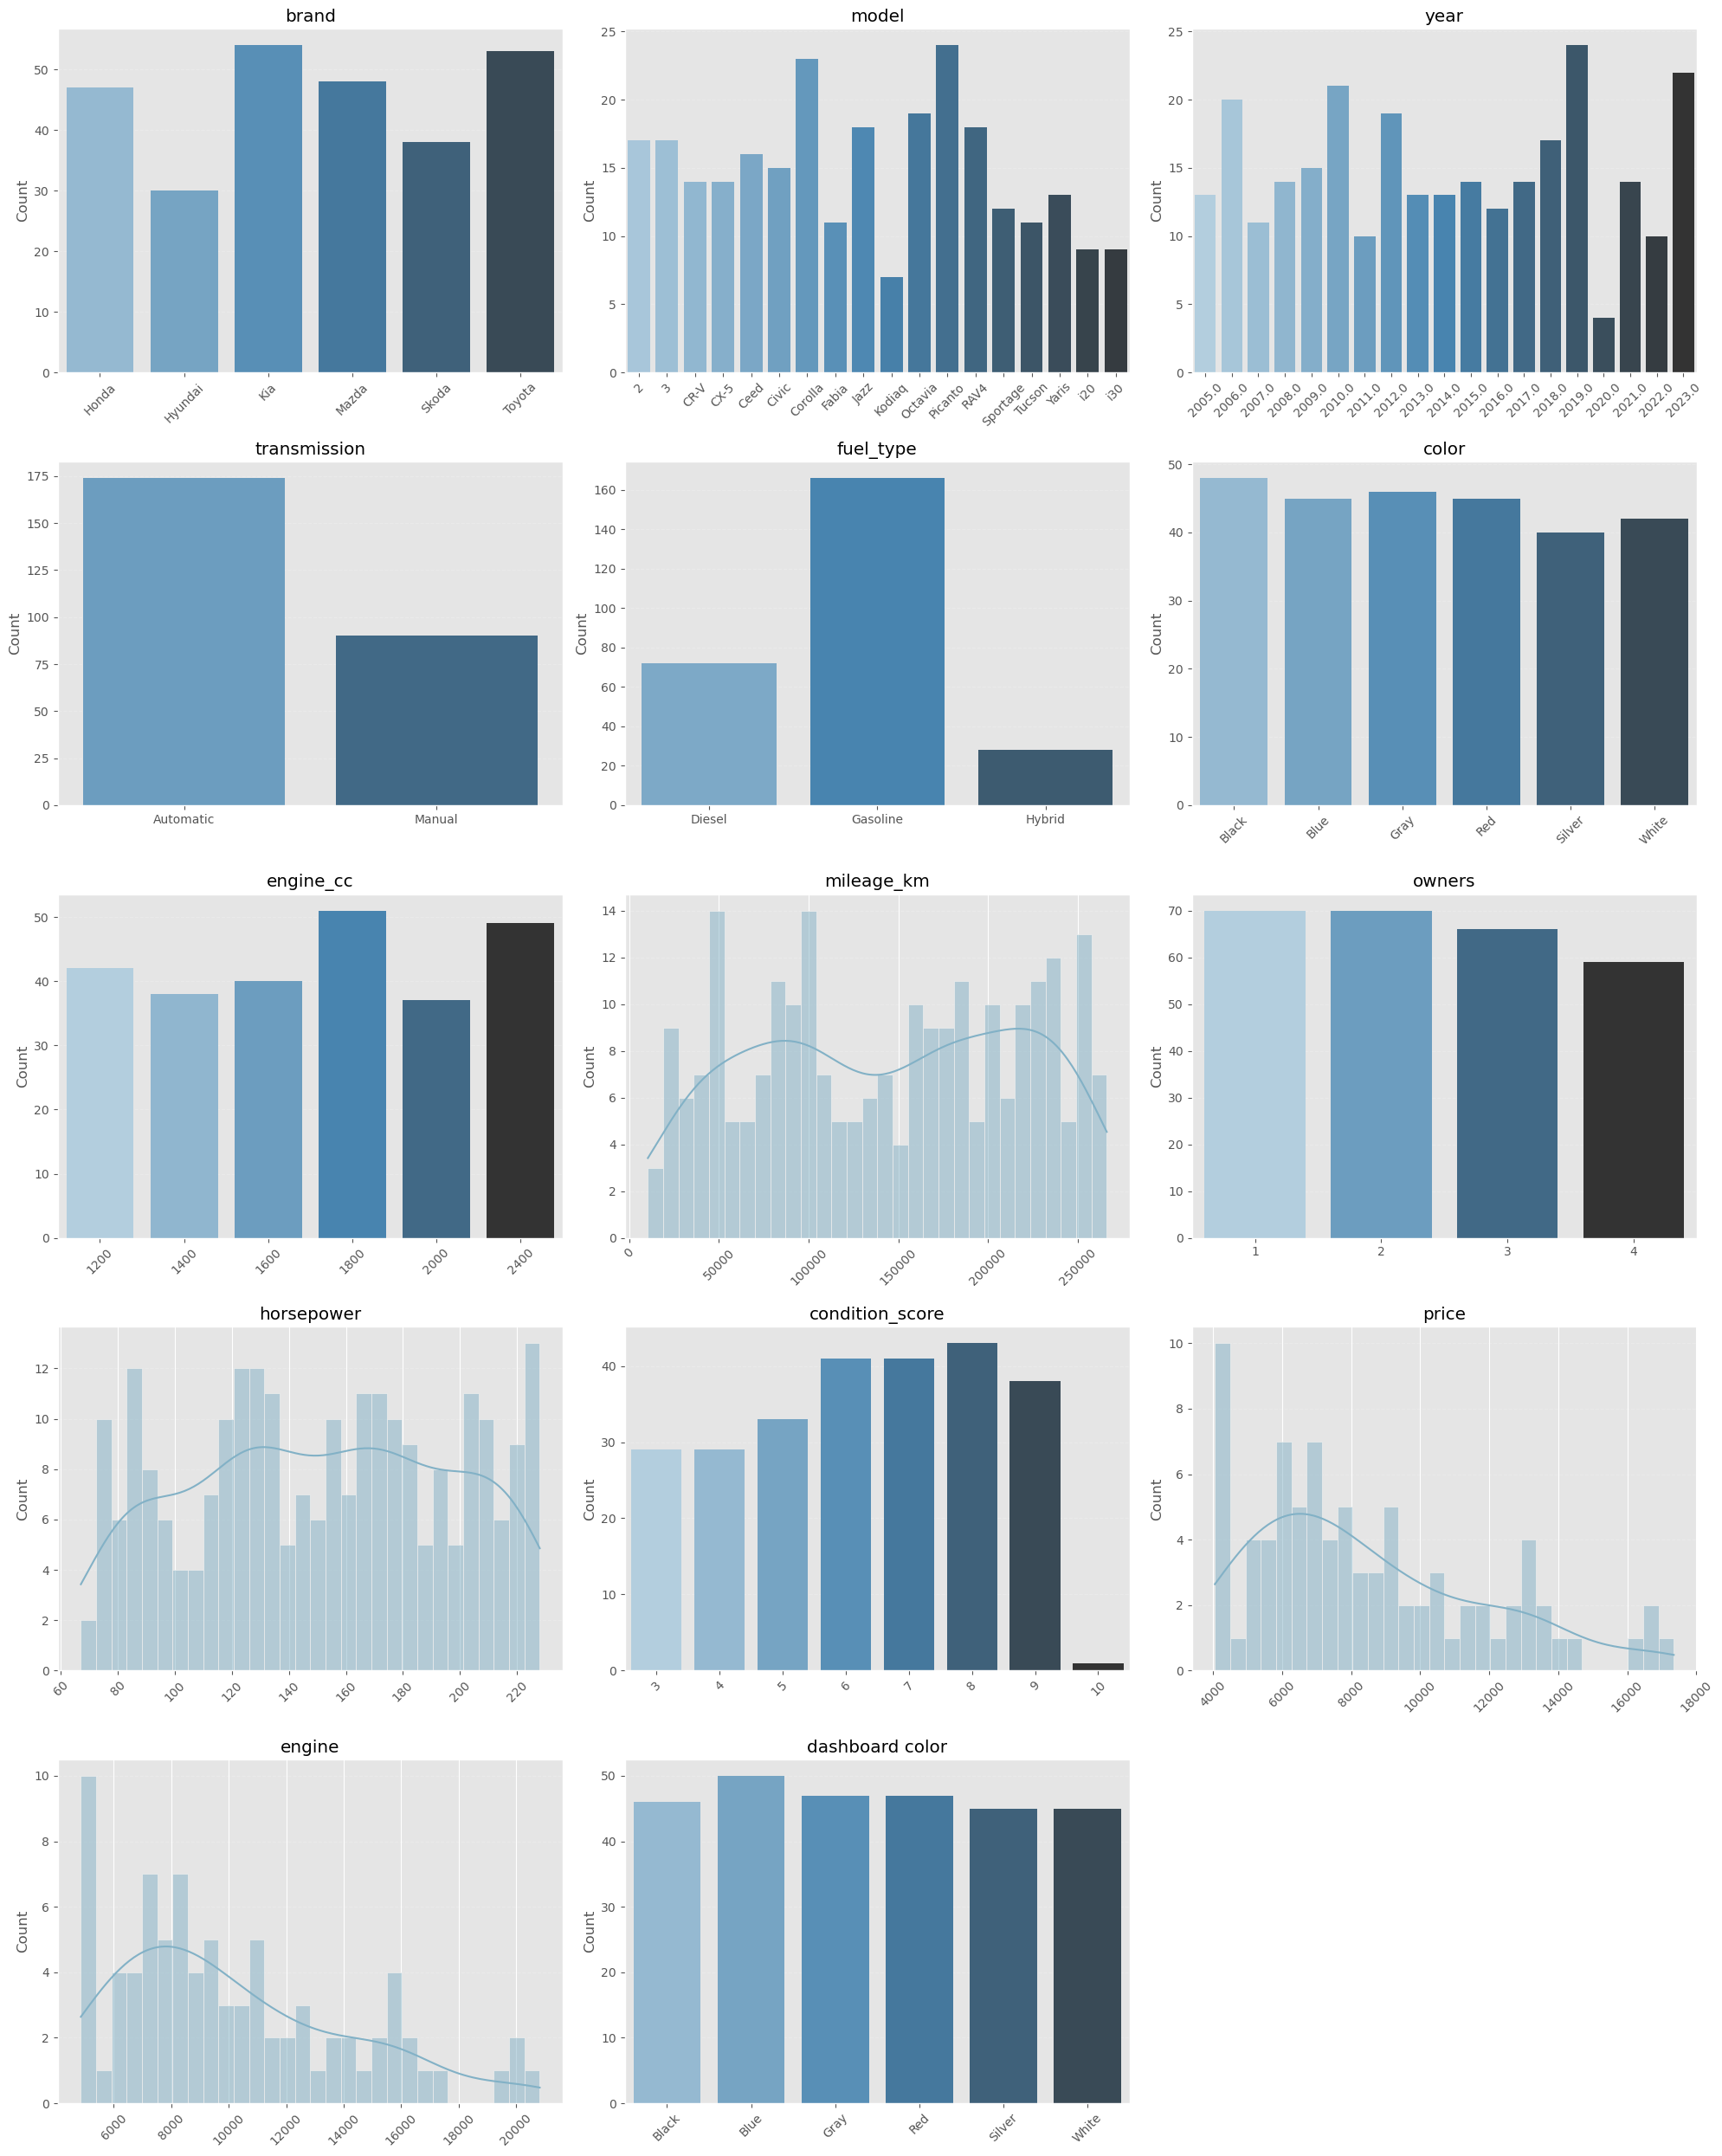

In [56]:
graph_stats(train_set)

<h3 dir="rtl" align="right">
הכנת נתונים לבדיקת קורלציה</h3>

<h3 dir="rtl" align="right">
יצירת עותק ללא ערכים חסרים
</h3>

In [59]:
dfna = train_set.dropna().copy()
dfna.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
284,Toyota,Corolla,2019.0000,Automatic,Diesel,Red,1600,156911,2,216,6,7505,9006,Red,284
123,Skoda,Octavia,2017.0000,Automatic,Diesel,Blue,1400,101148,4,224,7,8060,9672,Blue,123
23,Hyundai,i30,2018.0000,Automatic,Diesel,Red,2000,188752,2,127,8,4434,5321,Red,23
195,Kia,Picanto,2022.0000,Automatic,Hybrid,White,1800,31161,1,117,7,13262,15914,White,195
371,Skoda,Octavia,2021.0000,Automatic,Gasoline,Black,2400,102335,3,206,9,16344,19613,Black,371


<h3 dir="rtl" align="right">
המרת ערכי קטגוריות למספרים (Lable Encoding)</h3>

In [61]:
object_cols = dfna.select_dtypes(include=['object']).columns

for col in object_cols:
    dfna[col] = dfna[col].astype('category').cat.codes

dfna.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
284,5,5,2019.0000,0,0,3,1600,156911,2,216,6,7505,9006,3,284
123,4,9,2017.0000,0,0,1,1400,101148,4,224,7,8060,9672,1,123
23,1,13,2018.0000,0,0,3,2000,188752,2,127,8,4434,5321,3,23
195,2,10,2022.0000,0,2,5,1800,31161,1,117,7,13262,15914,5,195
371,4,9,2021.0000,0,1,0,2400,102335,3,206,9,16344,19613,0,371


<h3 dir="rtl" align="right">
    בקרה על הכנת הנתונים לבדיקת קורלציה
</h3>

In [63]:
check_df(dfna)

Dataset Shape: (33, 15)
Total rows with at least one NULL: 0


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,int8,33,0,0.0000,6
model,int8,33,0,0.0000,14
year,float64,33,0,0.0000,13
transmission,int8,33,0,0.0000,2
fuel_type,int8,33,0,0.0000,3
color,int8,33,0,0.0000,6
engine_cc,Int64,33,0,0.0000,6
mileage_km,Int64,33,0,0.0000,33
owners,Int64,33,0,0.0000,4
horsepower,Int64,33,0,0.0000,29


In [64]:
dfna.describe().round(2)

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
count,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000,33.0000
mean,2.5500,6.7300,2017.8500,0.1800,1.0000,2.5500,1781.8200,92534.9700,2.3600,164.5500,6.7900,7974.3300,9569.2400,2.5500,205.0600
std,1.6800,3.5500,4.0800,0.3900,0.7500,1.6800,428.2600,52842.8800,1.1900,41.1300,1.9600,3200.9200,3841.1100,1.6800,104.5900
min,0.0000,0.0000,2007.0000,0.0000,0.0000,0.0000,1200.0000,19418.0000,1.0000,75.0000,3.0000,4046.0000,4856.0000,0.0000,1.0000
25%,2.0000,4.0000,2017.0000,0.0000,0.0000,1.0000,1400.0000,48022.0000,1.0000,143.0000,6.0000,5555.0000,6666.0000,1.0000,128.0000
50%,2.0000,6.0000,2019.0000,0.0000,1.0000,3.0000,1800.0000,88271.0000,2.0000,169.0000,7.0000,7594.0000,9113.0000,3.0000,205.0000
75%,4.0000,10.0000,2020.0000,0.0000,2.0000,4.0000,2000.0000,116775.0000,3.0000,193.0000,8.0000,9702.0000,11643.0000,4.0000,287.0000
max,5.0000,13.0000,2023.0000,1.0000,2.0000,5.0000,2400.0000,222584.0000,4.0000,224.0000,9.0000,16344.0000,19613.0000,5.0000,389.0000


<h3 dir="rtl" align="right">
 חישוב מדד פירסון
</h3>

In [66]:
def correlation_matrix(df, exclude_cols=None, method='pearson', figsize=(9, 7), cmap='viridis'):
    
    df_work = df.copy()
    
    if exclude_cols:
        df_work = df_work.drop(columns=exclude_cols, errors='ignore')
    
    df_numeric = df_work.select_dtypes(include='number')
    
    corr_matrix = df_numeric.corr(method=method).round(2)
    
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix.abs(), annot=corr_matrix, vmin=0, vmax=1, fmt='.2f')
    plt.xticks(rotation=90, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    return corr_matrix

<h3 dir="rtl" align="right">
מטריצת קורלציה
</h3>

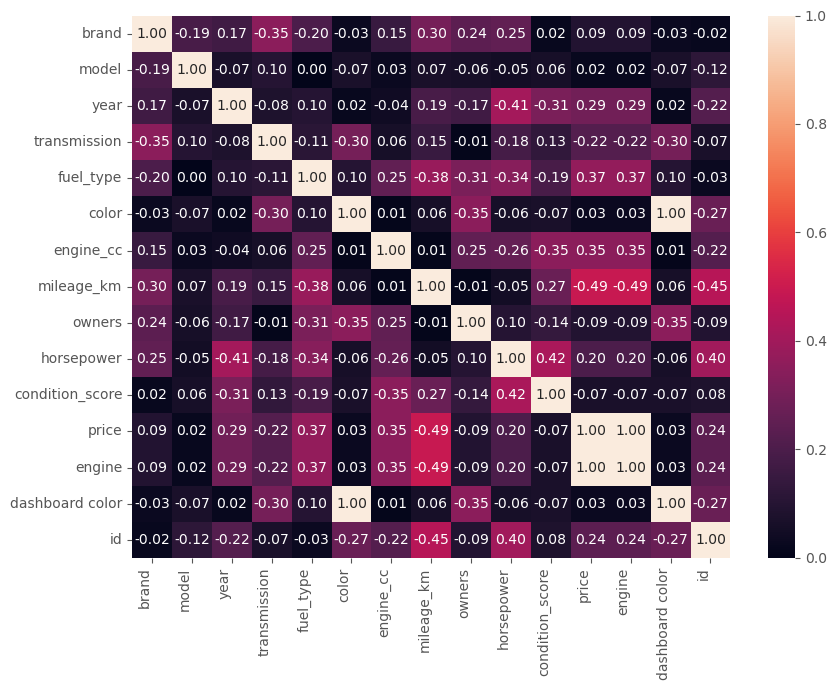

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,engine,dashboard color,id
brand,1.0000,-0.1900,0.1700,-0.3500,-0.2000,-0.0300,0.1500,0.3000,0.2400,0.2500,0.0200,0.0900,0.0900,-0.0300,-0.0200
model,-0.1900,1.0000,-0.0700,0.1000,0.0000,-0.0700,0.0300,0.0700,-0.0600,-0.0500,0.0600,0.0200,0.0200,-0.0700,-0.1200
year,0.1700,-0.0700,1.0000,-0.0800,0.1000,0.0200,-0.0400,0.1900,-0.1700,-0.4100,-0.3100,0.2900,0.2900,0.0200,-0.2200
transmission,-0.3500,0.1000,-0.0800,1.0000,-0.1100,-0.3000,0.0600,0.1500,-0.0100,-0.1800,0.1300,-0.2200,-0.2200,-0.3000,-0.0700
fuel_type,-0.2000,0.0000,0.1000,-0.1100,1.0000,0.1000,0.2500,-0.3800,-0.3100,-0.3400,-0.1900,0.3700,0.3700,0.1000,-0.0300
color,-0.0300,-0.0700,0.0200,-0.3000,0.1000,1.0000,0.0100,0.0600,-0.3500,-0.0600,-0.0700,0.0300,0.0300,1.0000,-0.2700
engine_cc,0.1500,0.0300,-0.0400,0.0600,0.2500,0.0100,1.0000,0.0100,0.2500,-0.2600,-0.3500,0.3500,0.3500,0.0100,-0.2200
mileage_km,0.3000,0.0700,0.1900,0.1500,-0.3800,0.0600,0.0100,1.0000,-0.0100,-0.0500,0.2700,-0.4900,-0.4900,0.0600,-0.4500
owners,0.2400,-0.0600,-0.1700,-0.0100,-0.3100,-0.3500,0.2500,-0.0100,1.0000,0.1000,-0.1400,-0.0900,-0.0900,-0.3500,-0.0900
horsepower,0.2500,-0.0500,-0.4100,-0.1800,-0.3400,-0.0600,-0.2600,-0.0500,0.1000,1.0000,0.4200,0.2000,0.2000,-0.0600,0.4000


In [68]:
correlation_matrix(dfna)

<h3 dir="rtl" align="right">
ניתוח ויזואלי של המתאם בין כל צמד המאפיינים
</h3>

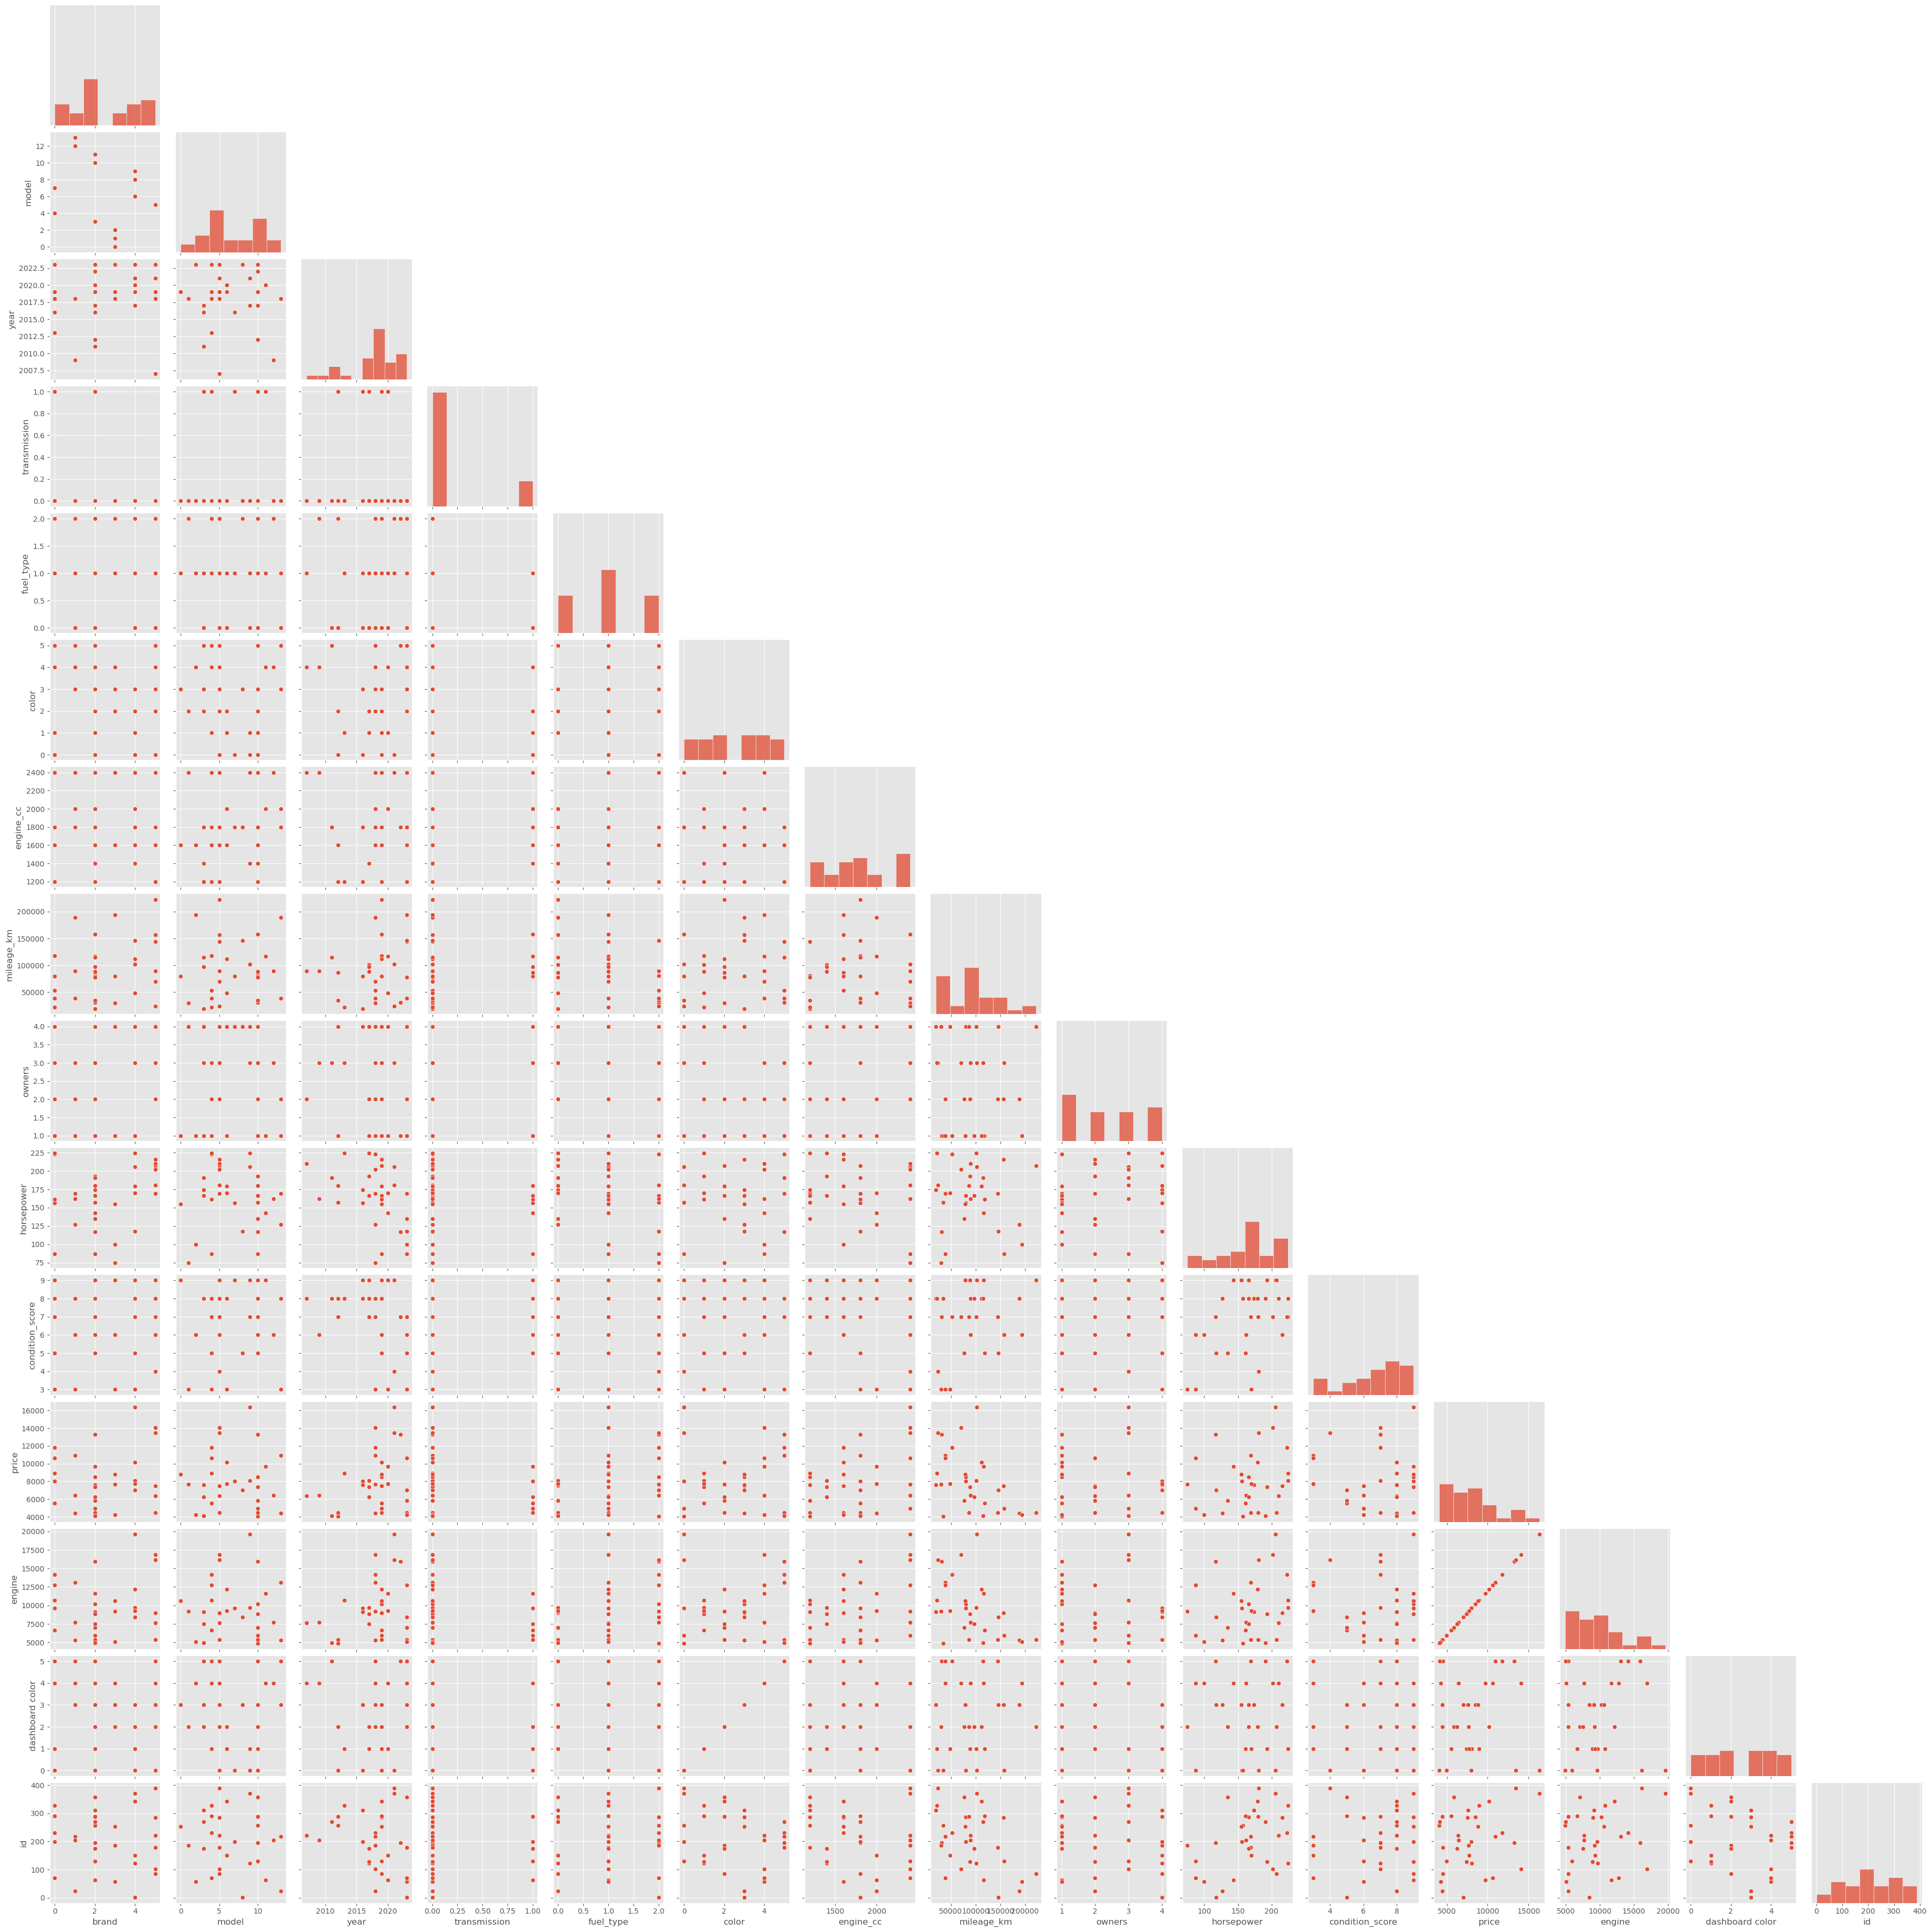

In [70]:
sns.pairplot(dfna, corner=True)
plt.show()

<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    מסקנות מניתוח הקורלציה
    <br><br>
    1.המאפיינים price ו engine זהים
    <br><br>
    2.המאפיינים color ו dashboard color זהים
</h3>

<h3 dir="rtl" align="right">
הסרת המאפיינים זהים
</h3>


In [73]:
train_set = train_set.drop(columns=['dashboard color', 'engine'])
val_set = val_set.drop(columns=['dashboard color', 'engine'])
test_set = test_set.drop(columns=['dashboard color', 'engine'])

In [74]:
train_set.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
157,Kia,Sportage,2012.0000,Automatic,NaN,Black,1200,95464,3,144,6,<NA>,157
109,Kia,Ceed,2019.0000,NaN,Diesel,Red,2000,232160,2,94,9,<NA>,109
17,Honda,Jazz,2009.0000,Manual,Diesel,Black,1800,204429,2,154,4,<NA>,17
347,Mazda,3,2013.0000,Automatic,Hybrid,NaN,1200,193243,2,131,4,<NA>,347
24,Honda,Jazz,2006.0000,Automatic,Gasoline,White,1200,19805,2,216,4,<NA>,24


<h3 dir="rtl" align="right">
ניקוי רשומות עם ערכים ריקים בעמודת המטרה (price)
</h3>

In [76]:
df_train = train_set.dropna(subset=['price']).copy()
df_val = val_set.dropna(subset=['price']).copy()
df_test = test_set.dropna(subset=['price']).copy()

<h3 dir="rtl" align="right">
צפייה במדגם של הנתונים לאחר העיבודים שבוצעו</h3>

In [78]:
df_train.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
245,Kia,NaN,2023.0000,Automatic,Gasoline,Silver,<NA>,177208,3,<NA>,9,10142,245
311,Skoda,Kodiaq,2017.0000,Automatic,Gasoline,Gray,1600,177018,3,201,<NA>,5791,311
145,Toyota,Yaris,2017.0000,Automatic,Diesel,Black,1800,<NA>,4,168,4,9234,145
265,Toyota,Yaris,2012.0000,Automatic,Gasoline,White,2400,<NA>,4,125,5,5537,265
139,Toyota,Corolla,2023.0000,Automatic,Gasoline,NaN,2000,20006,<NA>,<NA>,6,12749,139


<h3 dir="rtl" align="right">
 בדיקה חוזרת של כמות הרשמות בכל קבוצת נתונים (Train, Validation, Test)
</h3>

In [80]:
print(f"df_train:      {df_train.shape}")
print(f"df_val:       {df_val.shape}")
print(f"df_test:      {df_test.shape}")

df_train:      (85, 13)
df_val:       (18, 13)
df_test:      (20, 13)


<h3 dir="rtl" align="right">
בחינת ערכים חסרים
</h3>

In [82]:
check_df(df_train)

Dataset Shape: (85, 13)
Total rows with at least one NULL: 52


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,object,82,3,3.5300,6
model,object,81,4,4.7100,18
year,float64,85,0,0.0000,17
transmission,object,79,6,7.0600,2
fuel_type,object,81,4,4.7100,3
color,object,77,8,9.4100,6
engine_cc,Int64,74,11,12.9400,6
mileage_km,Int64,71,14,16.4700,71
owners,Int64,79,6,7.0600,4
horsepower,Int64,71,14,16.4700,58


<h3 dir="rtl" align="right">
טיפול בהשלמת ערכים חסרים
</h3>

<h3 dir="rtl" align="right">
בקרה שכל דגם משוייך חד ערכית למותג אחד בלבד</h3>

In [85]:
df_train.groupby('brand')['model'].agg(Model_Count='nunique', Models=lambda x: x.unique().tolist()).reset_index()

,brand,Model_Count,Models
0,Honda,3,"[Civic, Jazz, CR-V]"
1,Hyundai,3,"[i30, Tucson, i20, nan]"
2,Kia,3,"[nan, Ceed, Sportage, Picanto]"
3,Mazda,3,"[3, CX-5, 2]"
4,Skoda,3,"[Kodiaq, Octavia, Fabia]"
5,Toyota,3,"[Yaris, Corolla, RAV4, nan]"


In [86]:
df_train.groupby('model')['brand'].agg(count='nunique', brands='unique').query('count > 1')

,count,brands
model,,


<h3 dir="rtl" align="right">
השלמת הערכים החסרים של המותג על סמך הדגם</h3>

In [88]:
model_to_brand_df = (df_train.dropna(subset=['brand', 'model'])[['model', 'brand']].drop_duplicates().set_index('model'))

df_train['brand'] = df_train['brand'].fillna(df_train['model'].map(model_to_brand_df['brand']))
df_val['brand'] = df_val['brand'].fillna(df_val['model'].map(model_to_brand_df['brand']))
df_test['brand'] = df_test['brand'].fillna(df_test['model'].map(model_to_brand_df['brand']))

In [89]:
print(f"Brand nulls - Train: {df_train['brand'].isna().sum()}, "f"Val: {df_val['brand'].isna().sum()}, "f"Test: {df_test['brand'].isna().sum()}")

Brand nulls - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
הגדרת פונקציה להשלמת ערכים חסרים על סמך קורלציות של המאפיין למאפיינים נוספים</h3>

<h3 dir="rtl" align="right">
עבור ערכים רציפים יעשה שימוש בערך חציון ועבור ערכים בדידים יעשה שימוש בערך השכיח 
</h3>

In [92]:
def fill_with(df_train, dfs, target_col, hierarchy, method='mode', df_names=['Train', 'Val', 'Test']):
    print(f"\nProcessing '{target_col}' ({method})")
    
    if method in ['median', 'sample']:
        global_val = df_train[target_col].median()
        if not np.isnan(global_val): global_val = int(round(global_val))
    else:
        m = df_train[target_col].mode()
        global_val = m[0] if not m.empty else None

    for i, group_cols in enumerate(hierarchy, 1):
        needed_indices = [idx for idx, df in enumerate(dfs) if df[target_col].isna().any()]
        if not needed_indices:
            break
            
        print(f"  Level {i}: {group_cols} (Active for: {[df_names[idx] for idx in needed_indices]})")
        
        if method == 'sample':
            lookup = df_train.dropna(subset=[target_col]).groupby(group_cols)[target_col].apply(list)
        elif method == 'median':
            lookup = df_train.groupby(group_cols)[target_col].median().round().astype('Int64')
        else:
            lookup = df_train.groupby(group_cols)[target_col].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
        
        for idx in needed_indices:
            df = dfs[idx]
            mask = df[target_col].isna()
            
            temp_merged = df[group_cols].merge(lookup.rename('tmp_val'), on=group_cols, how='left')
            temp_merged.index = df.index
            
            if method == 'sample':
                def pick_val(lst):
                    return random.choice(lst) if isinstance(lst, list) else np.nan
                fill_values = temp_merged.loc[mask, 'tmp_val'].apply(pick_val)
                df.loc[mask, target_col] = df.loc[mask, target_col].fillna(fill_values).infer_objects(copy=False)
            else:
                df.loc[mask, target_col] = df.loc[mask, target_col].fillna(temp_merged['tmp_val']).infer_objects(copy=False)

    for df in dfs:
        if df[target_col].isna().any():
            df[target_col] = df[target_col].fillna(global_val).infer_objects(copy=False)
        
    null_counts = [f"{name}: {df[target_col].isna().sum()}" for df, name in zip(dfs, df_names)]
    print(f" NULL  - {', '.join(null_counts)}")
    
    return dfs

In [93]:
dfs = [df_train, df_val, df_test]

<h3 dir="rtl" align="right">
השלמת ערכי דגם על פי שכיח
</h3>

In [95]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'model', 
                                      [['brand', 'transmission', 'color', 'year'],
                                       ['brand', 'transmission', 'color'],
                                       ['brand', 'transmission'],
                                       ['brand']],
                                      method='mode')


Processing 'model' (mode)
  Level 1: ['brand', 'transmission', 'color', 'year'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['brand', 'transmission', 'color'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['brand', 'transmission'] (Active for: ['Train', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי תיבת הילוכים חסרים על פי הערך השכיח
</h3>

In [97]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'transmission', 
                                      [['brand', 'color', 'horsepower', 'mileage_km', 'condition_score', 'price'],
                                       ['brand', 'color', 'horsepower', 'mileage_km', 'condition_score'],
                                       ['brand', 'color', 'horsepower', 'mileage_km'],
                                       ['brand', 'color', 'horsepower'],
                                       ['brand', 'color']],
                                      method='mode')


Processing 'transmission' (mode)
  Level 1: ['brand', 'color', 'horsepower', 'mileage_km', 'condition_score', 'price'] (Active for: ['Train'])
  Level 2: ['brand', 'color', 'horsepower', 'mileage_km', 'condition_score'] (Active for: ['Train'])
  Level 3: ['brand', 'color', 'horsepower', 'mileage_km'] (Active for: ['Train'])
  Level 4: ['brand', 'color', 'horsepower'] (Active for: ['Train'])
  Level 5: ['brand', 'color'] (Active for: ['Train'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי סוג דלק חסרים על פי הערך השכיח
</h3>


In [99]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'fuel_type', 
                                      [['mileage_km', 'horsepower', 'owners', 'engine_cc', 'brand' , 'price'],
                                       ['mileage_km', 'horsepower', 'owners', 'engine_cc', 'brand'],
                                       ['mileage_km', 'horsepower', 'owners', 'engine_cc'],
                                       ['mileage_km', 'horsepower', 'owners'],
                                       ['mileage_km', 'horsepower']],
                                      method='mode')


Processing 'fuel_type' (mode)
  Level 1: ['mileage_km', 'horsepower', 'owners', 'engine_cc', 'brand', 'price'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['mileage_km', 'horsepower', 'owners', 'engine_cc', 'brand'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['mileage_km', 'horsepower', 'owners', 'engine_cc'] (Active for: ['Train', 'Val', 'Test'])
  Level 4: ['mileage_km', 'horsepower', 'owners'] (Active for: ['Train', 'Val', 'Test'])
  Level 5: ['mileage_km', 'horsepower'] (Active for: ['Train', 'Val', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי צבע חסרים על פי הערך השכיח
</h3>


In [101]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'color', 
                                      [['owners', 'transmission', 'condition_score', 'model'],
                                       ['owners', 'transmission', 'condition_score'],
                                       ['owners', 'transmission']],
                                      method='mode')


Processing 'color' (mode)
  Level 1: ['owners', 'transmission', 'condition_score', 'model'] (Active for: ['Train', 'Test'])
  Level 2: ['owners', 'transmission', 'condition_score'] (Active for: ['Train', 'Test'])
  Level 3: ['owners', 'transmission'] (Active for: ['Train'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי נפח המנוע חסרים על פי הערך השכיח
</h3>


In [103]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'engine_cc', 
                                      [['brand', 'model', 'fuel_type', 'owners'],
                                       ['brand', 'model', 'fuel_type'],
                                       ['brand', 'model']],
                                      method='mode')


Processing 'engine_cc' (mode)
  Level 1: ['brand', 'model', 'fuel_type', 'owners'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['brand', 'model', 'fuel_type'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['brand', 'model'] (Active for: ['Train', 'Val', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי קילומטראז' חסרים על פי ערך החציון
</h3>


In [105]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'mileage_km', 
                                      [['fuel_type', 'brand', 'condition_score', 'year', 'price'],
                                       ['fuel_type', 'brand', 'condition_score', 'year'],
                                       ['fuel_type', 'brand', 'condition_score'],
                                       ['fuel_type', 'brand']],
                                      method='median')


Processing 'mileage_km' (median)
  Level 1: ['fuel_type', 'brand', 'condition_score', 'year', 'price'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['fuel_type', 'brand', 'condition_score', 'year'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['fuel_type', 'brand', 'condition_score'] (Active for: ['Train', 'Val', 'Test'])
  Level 4: ['fuel_type', 'brand'] (Active for: ['Train', 'Val', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי בעלות חסרים על פי הערך השכיח
</h3>

In [107]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'owners', 
                                      [['color', 'fuel_type', 'engine_cc', 'brand'],
                                       ['color', 'fuel_type', 'engine_cc'],
                                       ['color', 'fuel_type']],
                                      method='mode')


Processing 'owners' (mode)
  Level 1: ['color', 'fuel_type', 'engine_cc', 'brand'] (Active for: ['Train'])
  Level 2: ['color', 'fuel_type', 'engine_cc'] (Active for: ['Train'])
  Level 3: ['color', 'fuel_type'] (Active for: ['Train'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי כוחות סוס חסרים על פי ערך החציון
</h3>

In [109]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'horsepower', 
                                      [['condition_score', 'year', 'fuel_type', 'engine_cc', 'brand'],
                                       ['condition_score', 'year', 'fuel_type', 'engine_cc'],
                                       ['condition_score', 'year', 'fuel_type'],
                                       ['condition_score', 'year']],
                                      method='median')


Processing 'horsepower' (median)
  Level 1: ['condition_score', 'year', 'fuel_type', 'engine_cc', 'brand'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['condition_score', 'year', 'fuel_type', 'engine_cc'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['condition_score', 'year', 'fuel_type'] (Active for: ['Train', 'Val', 'Test'])
  Level 4: ['condition_score', 'year'] (Active for: ['Train', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
השלמת ערכי ציון הרכב חסרים על פי הערך השכיח
</h3>

In [111]:
df_train, df_val, df_test = fill_with(df_train, dfs, 'condition_score', 
                                      [['horsepower', 'engine_cc', 'year', 'mileage_km'],
                                       ['horsepower', 'engine_cc', 'year'],
                                       ['horsepower', 'engine_cc']],
                                      method='mode')


Processing 'condition_score' (mode)
  Level 1: ['horsepower', 'engine_cc', 'year', 'mileage_km'] (Active for: ['Train', 'Val', 'Test'])
  Level 2: ['horsepower', 'engine_cc', 'year'] (Active for: ['Train', 'Val', 'Test'])
  Level 3: ['horsepower', 'engine_cc'] (Active for: ['Train', 'Val', 'Test'])
 NULL  - Train: 0, Val: 0, Test: 0


<h3 dir="rtl" align="right">
בקרה סופית על כלל הנתונים
</h3>

<h3 dir="rtl" align="right">
תצוגה ראשונית, בקרת nulls, נתונים סטטסטים, תצוגה ויזואלית של התפלגות הנתונים
</h3>

In [114]:
df_train.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
245,Kia,Sportage,2023.0000,Automatic,Gasoline,Silver,1800,177208,3,108,9,10142,245
311,Skoda,Kodiaq,2017.0000,Automatic,Gasoline,Gray,1600,177018,3,201,9,5791,311
145,Toyota,Yaris,2017.0000,Automatic,Diesel,Black,1800,156911,4,168,4,9234,145
265,Toyota,Yaris,2012.0000,Automatic,Gasoline,White,2400,85250,4,125,5,5537,265
139,Toyota,Corolla,2023.0000,Automatic,Gasoline,Silver,2000,20006,1,190,6,12749,139


In [115]:
check_df(df_train)

Dataset Shape: (85, 13)
Total rows with at least one NULL: 0


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,object,85,0,0.0000,6
model,object,85,0,0.0000,18
year,float64,85,0,0.0000,17
transmission,object,85,0,0.0000,2
fuel_type,object,85,0,0.0000,3
color,object,85,0,0.0000,6
engine_cc,Int64,85,0,0.0000,6
mileage_km,Int64,85,0,0.0000,75
owners,Int64,85,0,0.0000,4
horsepower,Int64,85,0,0.0000,59


In [116]:
df_train.describe().round(2)

,year,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
count,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000
mean,2017.4600,1821.1800,87081.0600,2.2900,163.4200,6.9600,8451.6800,200.3300
std,4.4200,390.3900,50354.3100,1.1800,43.1200,1.9100,3347.0900,109.9900
min,2007.0000,1200.0000,15795.0000,1.0000,75.0000,3.0000,4046.0000,1.0000
25%,2014.0000,1600.0000,47907.0000,1.0000,125.0000,6.0000,6002.0000,107.0000
50%,2018.0000,1800.0000,82222.0000,2.0000,169.0000,7.0000,7594.0000,205.0000
75%,2021.0000,2000.0000,115048.0000,3.0000,201.0000,9.0000,10381.0000,295.0000
max,2023.0000,2400.0000,222584.0000,4.0000,227.0000,9.0000,17349.0000,399.0000


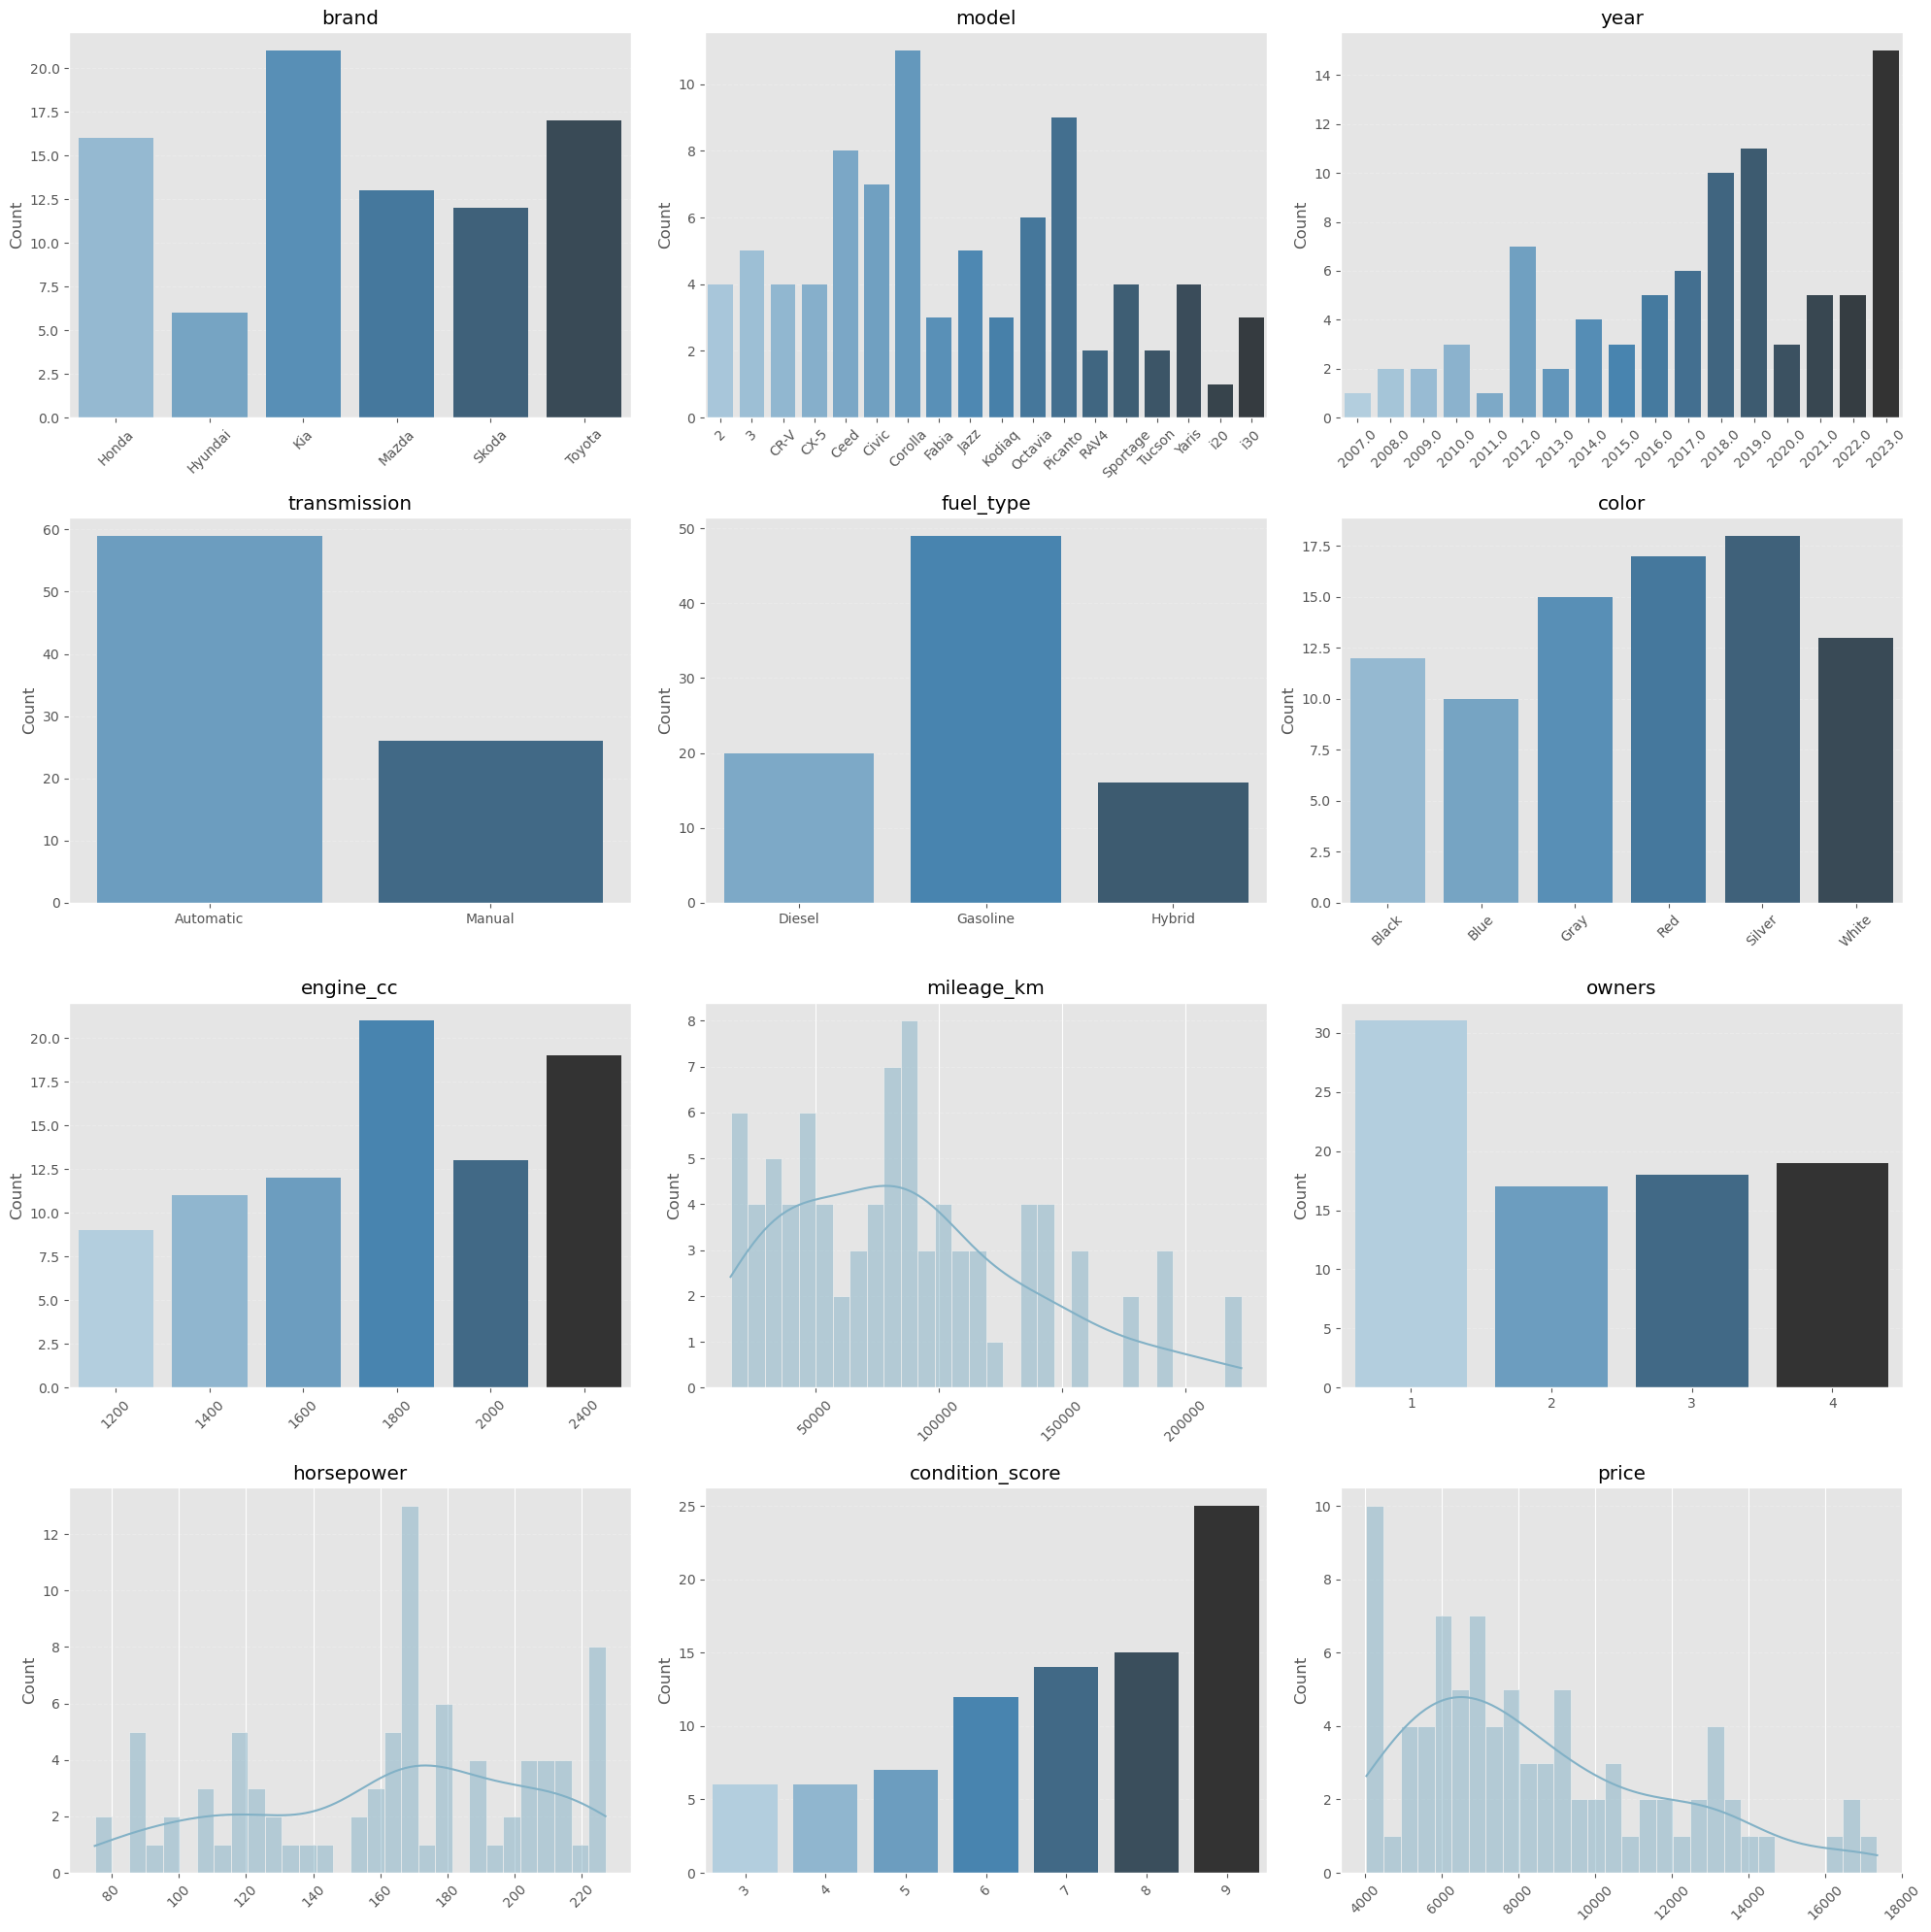

In [117]:
graph_stats(df_train)

<h3 dir="rtl" align="right">
הפיכת המשתנים הקטגוריאליים למספרים באמצעות Label Encoder ומילון
</h3>

In [119]:
encoders = {}
obj_cols = df_train.select_dtypes(include=['object']).columns

for col in obj_cols:
    le = LabelEncoder()
    
    df_train[col] = le.fit_transform(df_train[col].astype(str))
    df_val[col] = le.transform(df_val[col].astype(str))
    df_test[col] = le.transform(df_test[col].astype(str))
    
    df_train[col] = df_train[col].astype('Int64')
    df_val[col] = df_val[col].astype('Int64')
    df_test[col] = df_test[col].astype('Int64')
    
    encoders[col] = le

In [120]:
for col, encoder in encoders.items():
    print(f"\n{col}:")
    print(dict(enumerate(encoder.classes_)))


brand:
{0: 'Honda', 1: 'Hyundai', 2: 'Kia', 3: 'Mazda', 4: 'Skoda', 5: 'Toyota'}

model:
{0: '2', 1: '3', 2: 'CR-V', 3: 'CX-5', 4: 'Ceed', 5: 'Civic', 6: 'Corolla', 7: 'Fabia', 8: 'Jazz', 9: 'Kodiaq', 10: 'Octavia', 11: 'Picanto', 12: 'RAV4', 13: 'Sportage', 14: 'Tucson', 15: 'Yaris', 16: 'i20', 17: 'i30'}

transmission:
{0: 'Automatic', 1: 'Manual'}

fuel_type:
{0: 'Diesel', 1: 'Gasoline', 2: 'Hybrid'}

color:
{0: 'Black', 1: 'Blue', 2: 'Gray', 3: 'Red', 4: 'Silver', 5: 'White'}


<h3 dir="rtl" align="right">
בקרה נוספת על המשתנים הקטגוריאליים 
</h3>

In [122]:
df_train.head()

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
245,2,13,2023.0000,0,1,4,1800,177208,3,108,9,10142,245
311,4,9,2017.0000,0,1,2,1600,177018,3,201,9,5791,311
145,5,15,2017.0000,0,0,0,1800,156911,4,168,4,9234,145
265,5,15,2012.0000,0,1,5,2400,85250,4,125,5,5537,265
139,5,6,2023.0000,0,1,4,2000,20006,1,190,6,12749,139


In [123]:
check_df(df_train)

Dataset Shape: (85, 13)
Total rows with at least one NULL: 0


,Dtype,Non-Null Count,Null Count,Null Percent,Unique
brand,Int64,85,0,0.0000,6
model,Int64,85,0,0.0000,18
year,float64,85,0,0.0000,17
transmission,Int64,85,0,0.0000,2
fuel_type,Int64,85,0,0.0000,3
color,Int64,85,0,0.0000,6
engine_cc,Int64,85,0,0.0000,6
mileage_km,Int64,85,0,0.0000,75
owners,Int64,85,0,0.0000,4
horsepower,Int64,85,0,0.0000,59


In [124]:
df_train.describe().round(2)

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
count,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000,85.0000
mean,2.5900,7.4800,2017.4600,0.3100,0.9500,2.6800,1821.1800,87081.0600,2.2900,163.4200,6.9600,8451.6800,200.3300
std,1.7400,4.6000,4.4200,0.4600,0.6500,1.6300,390.3900,50354.3100,1.1800,43.1200,1.9100,3347.0900,109.9900
min,0.0000,0.0000,2007.0000,0.0000,0.0000,0.0000,1200.0000,15795.0000,1.0000,75.0000,3.0000,4046.0000,1.0000
25%,1.0000,4.0000,2014.0000,0.0000,1.0000,1.0000,1600.0000,47907.0000,1.0000,125.0000,6.0000,6002.0000,107.0000
50%,2.0000,6.0000,2018.0000,0.0000,1.0000,3.0000,1800.0000,82222.0000,2.0000,169.0000,7.0000,7594.0000,205.0000
75%,4.0000,11.0000,2021.0000,1.0000,1.0000,4.0000,2000.0000,115048.0000,3.0000,201.0000,9.0000,10381.0000,295.0000
max,5.0000,17.0000,2023.0000,1.0000,2.0000,5.0000,2400.0000,222584.0000,4.0000,227.0000,9.0000,17349.0000,399.0000


<h3 dir="rtl" align="right">
בדיקת קורלציה על כלל הנתונים לאחר סיום העיבוד 
</h3>

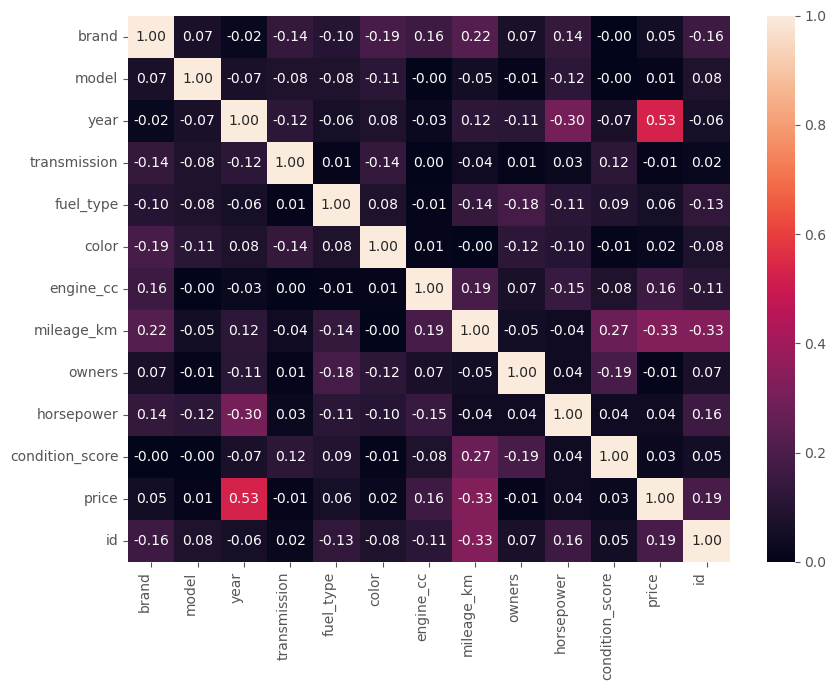

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
brand,1.0000,0.0700,-0.0200,-0.1400,-0.1000,-0.1900,0.1600,0.2200,0.0700,0.1400,-0.0000,0.0500,-0.1600
model,0.0700,1.0000,-0.0700,-0.0800,-0.0800,-0.1100,-0.0000,-0.0500,-0.0100,-0.1200,-0.0000,0.0100,0.0800
year,-0.0200,-0.0700,1.0000,-0.1200,-0.0600,0.0800,-0.0300,0.1200,-0.1100,-0.3000,-0.0700,0.5300,-0.0600
transmission,-0.1400,-0.0800,-0.1200,1.0000,0.0100,-0.1400,0.0000,-0.0400,0.0100,0.0300,0.1200,-0.0100,0.0200
fuel_type,-0.1000,-0.0800,-0.0600,0.0100,1.0000,0.0800,-0.0100,-0.1400,-0.1800,-0.1100,0.0900,0.0600,-0.1300
color,-0.1900,-0.1100,0.0800,-0.1400,0.0800,1.0000,0.0100,-0.0000,-0.1200,-0.1000,-0.0100,0.0200,-0.0800
engine_cc,0.1600,-0.0000,-0.0300,0.0000,-0.0100,0.0100,1.0000,0.1900,0.0700,-0.1500,-0.0800,0.1600,-0.1100
mileage_km,0.2200,-0.0500,0.1200,-0.0400,-0.1400,-0.0000,0.1900,1.0000,-0.0500,-0.0400,0.2700,-0.3300,-0.3300
owners,0.0700,-0.0100,-0.1100,0.0100,-0.1800,-0.1200,0.0700,-0.0500,1.0000,0.0400,-0.1900,-0.0100,0.0700
horsepower,0.1400,-0.1200,-0.3000,0.0300,-0.1100,-0.1000,-0.1500,-0.0400,0.0400,1.0000,0.0400,0.0400,0.1600


In [126]:
correlation_matrix(df_train)

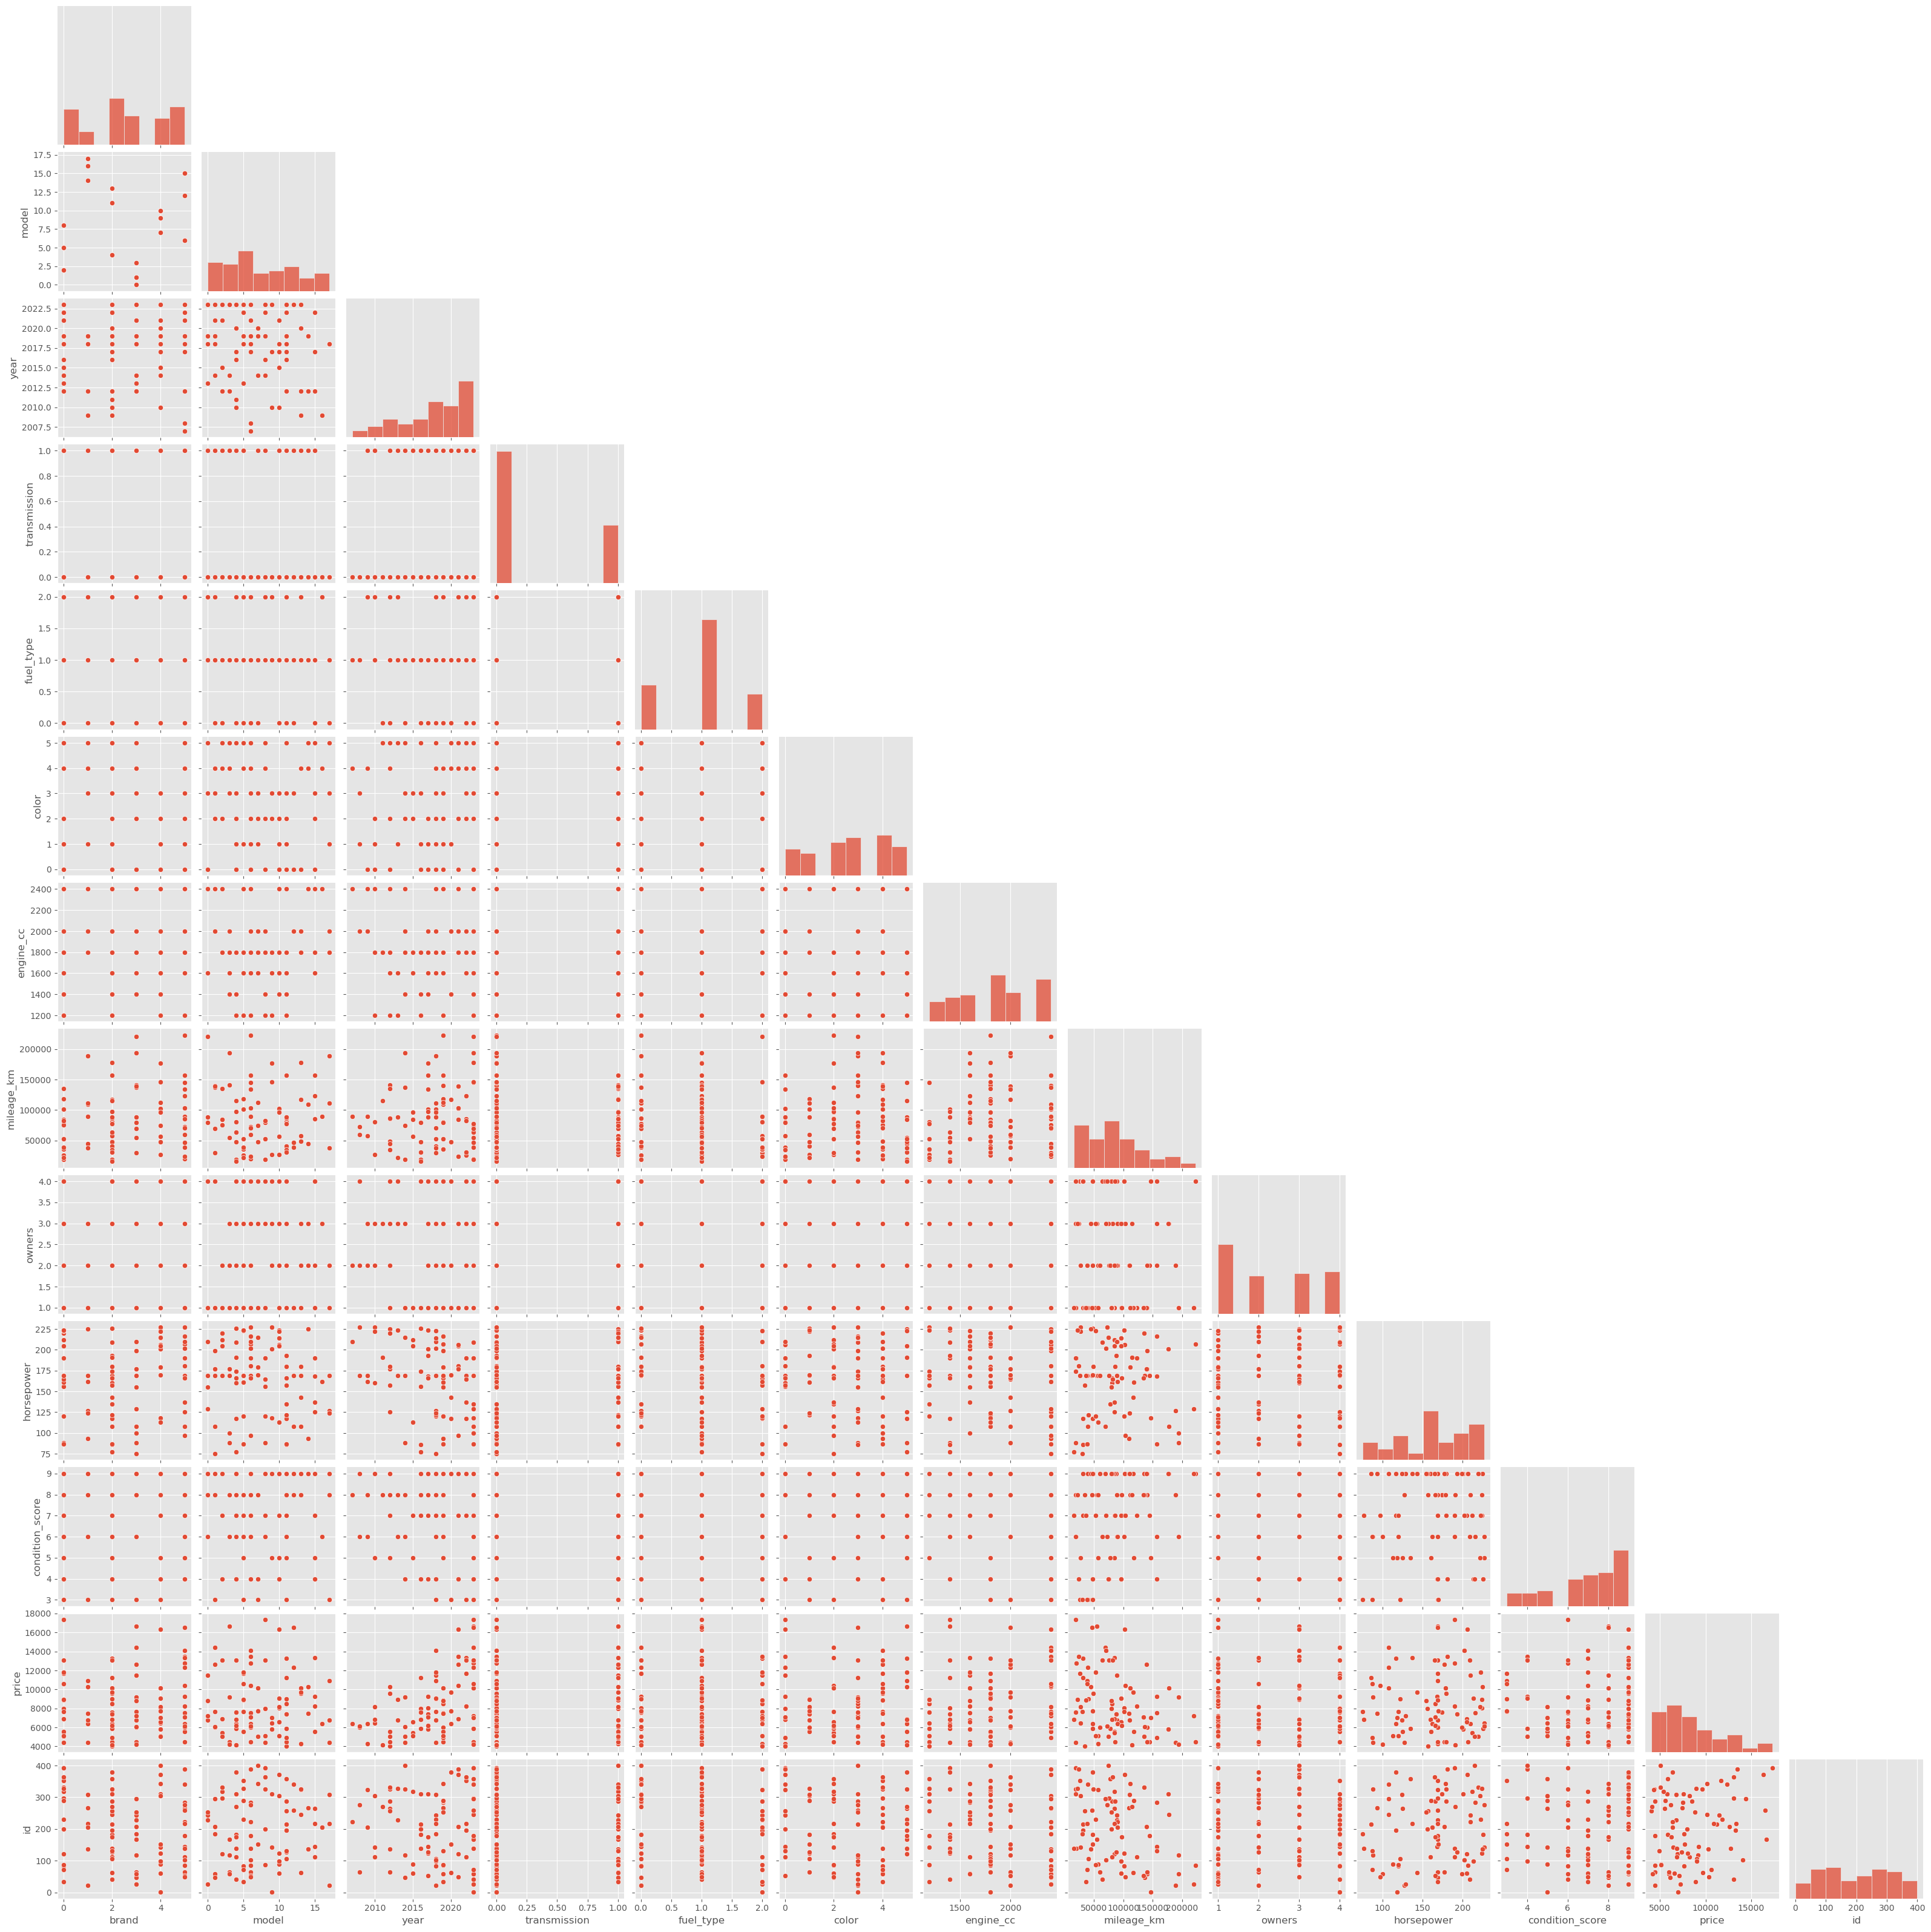

In [127]:
sns.pairplot(df_train, corner=True)
plt.show()

<h2 dir="rtl" align="right">
חלק ד': מדד שגיאה (Error Metric)
</h2>

<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    לצורך הערכת ביצועי המודלים ובחירת המודל האופטימלי, בחרתי להשתמש במדד R² כמדד המרכזי להשוואה.
    <br><br>
    פונקציית המטרה שלנו הינה המחיר, שהינו משתנה רציף. לכן, המודלים העומדים לרשותנו הינם מודלי רגרסיה. עבור מודלים אלה המדדים המרכזיים הינם R², RMSE, MAE.
    <br><br>
    R² הינו מדד מנורמל המייצג את השונות במאפיין הנבחר, שהמודל מצליח להסביר (ומכאן על איכות הלמידה של המודל). מודל שמצליח להסביר אחוז גבוה ועקבי מהשונות בערך המשתנה הנבחן, הוא המודל שיוכל לספק תחזית מהימנה יותר עבור המאפיין, במקרה שלנו מחיר הרכב.
    <br><br>
    בנוסף, בניגוד למדדים האחרים, שהינם מדדי שגיאה אבסולוטיים, המושפעים מהנתון עצמו, ה-R² מאפשר לבצע השוואה ישירה בין המודלים השונים, ללא תלות בערך של המשתנה. 
</h3>

<h2 dir="rtl" align="right">
חלק ה': פיתוח המודלים והשוואה
</h2>

<h3 dir="rtl" align="right">
ארגון הנתונים לטובת הרצה במודלים השונים תוך שימוש בשיטות השונות לערכת הביצועיים של המודל 
</h3>

<h3 dir="rtl" align="right">
להבדיל משיטת ה Hold-out בה נדרש להפריד את הנתונים ל 2 חלקים (Train, Validation) בשיטות האחרות נדרש לאחד את 2 החלקים.
</h3>

In [133]:
df_full = pd.concat([df_train, df_val], axis=0).reset_index(drop=True)
df_full

,brand,model,year,transmission,fuel_type,color,engine_cc,mileage_km,owners,horsepower,condition_score,price,id
0,2,13,2023.0000,0,1,4,1800,177208,3,108,9,10142,245
1,4,9,2017.0000,0,1,2,1600,177018,3,201,9,5791,311
2,5,15,2017.0000,0,0,0,1800,156911,4,168,4,9234,145
3,5,15,2012.0000,0,1,5,2400,85250,4,125,5,5537,265
4,5,6,2023.0000,0,1,4,2000,20006,1,190,6,12749,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,4,9,2010.0000,0,0,4,1400,19907,3,216,9,8407,75
99,2,13,2019.0000,0,1,0,1400,133520,3,155,9,7409,248
100,0,8,2019.0000,0,1,1,2000,184874,2,187,9,4301,132
101,5,15,2020.0000,0,0,2,1800,132134,2,145,7,6639,321


<h3 dir="rtl" align="right">
בכלל ה datasets, נדרש להסיר מהנתונים את עמודת ה id (שאינה רלוונטית להרצת המודל) וכן את מאפיין היעד – מחיר (שהינו פונקציית המטרה)
</h3>


In [135]:
X_train, y_train = df_train.drop(columns=['price', 'id']), df_train['price']
X_val, y_val = df_val.drop(columns=['price', 'id']), df_val['price']
X_full, y_full = df_full.drop(columns=['price', 'id']), df_full['price']
X_test, y_test = df_test.drop(columns=['price', 'id']), df_test['price']

<h3 dir="rtl" align="right">
טיפול בכלל הנתונים הנומריים (ולמעשה כלל הנתונים לאחר שהמחרוזות הומרו לערכים נומריים), באופן שינורמלו לערכים שבין 1- ל 1
</h3>


In [137]:
scalers = {}
num_cols = X_train.columns 

for col in num_cols:
    sc = StandardScaler()
    
    X_train[col] = sc.fit_transform(X_train[[col]])
    X_val[col] = sc.transform(X_val[[col]])
    X_test[col] = sc.transform(X_test[[col]])
    X_full[col] = sc.transform(X_full[[col]])
    
    scalers[col] = sc

In [138]:
for col, sc in scalers.items():
    print(f"Feature: {col}")
    print(f"  Mean: {sc.mean_[0]:.2f}")
    print(f"  Standard Deviation: {sc.scale_[0]:.2f}")

Feature: brand
  Mean: 2.59
  Standard Deviation: 1.73
Feature: model
  Mean: 7.48
  Standard Deviation: 4.57
Feature: year
  Mean: 2017.46
  Standard Deviation: 4.39
Feature: transmission
  Mean: 0.31
  Standard Deviation: 0.46
Feature: fuel_type
  Mean: 0.95
  Standard Deviation: 0.65
Feature: color
  Mean: 2.68
  Standard Deviation: 1.62
Feature: engine_cc
  Mean: 1821.18
  Standard Deviation: 388.09
Feature: mileage_km
  Mean: 87081.06
  Standard Deviation: 50057.23
Feature: owners
  Mean: 2.29
  Standard Deviation: 1.18
Feature: horsepower
  Mean: 163.42
  Standard Deviation: 42.86
Feature: condition_score
  Mean: 6.96
  Standard Deviation: 1.89


<h3 dir="rtl" align="right">
יצירת פונקציה שמחזירה את המדדים השונים (R2, RMSE, MAE) עבור כל אחת משיטות המדידה (hold-out, 10-fold cross validation, leave-one-out) עבור המודל המבוקש
</h3>


In [140]:
def evaluate_regression_models(model, name, X_train, y_train, X_val, y_val, X_full, y_full):
    model.fit(X_train, y_train)
    y_pred_train_h = model.predict(X_train)
    y_pred_val_h = model.predict(X_val)
    
    res_holdout = {
        'Model': name, 'Method': 'Hold-out', 
        'Train MAE': mean_absolute_error(y_train, y_pred_train_h),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train_h)),
        'Train R2': r2_score(y_train, y_pred_train_h),
        'Val MAE': mean_absolute_error(y_val, y_pred_val_h),
        'Val RMSE': np.sqrt(mean_squared_error(y_val, y_pred_val_h)),
        'Val R2': r2_score(y_val, y_pred_val_h)}

    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    y_pred_cv_val = cross_val_predict(model, X_full, y_full, cv=kf)
    
    model.fit(X_full, y_full)
    y_pred_cv_train = model.predict(X_full)
    
    res_cv = {
        'Model': name, 'Method': '10-Fold CV', 
        'Train MAE': mean_absolute_error(y_full, y_pred_cv_train),
        'Train RMSE': np.sqrt(mean_squared_error(y_full, y_pred_cv_train)),
        'Train R2': r2_score(y_full, y_pred_cv_train),
        'Val MAE': mean_absolute_error(y_full, y_pred_cv_val),
        'Val RMSE': np.sqrt(mean_squared_error(y_full, y_pred_cv_val)),
        'Val R2': r2_score(y_full, y_pred_cv_val)}

    loo = LeaveOneOut()
    y_pred_loo_val = cross_val_predict(model, X_full, y_full, cv=loo)
    
    y_pred_loo_train = model.predict(X_full)
    
    res_loo = {
        'Model': name, 'Method': 'Leave-One-Out', 
        'Train MAE': mean_absolute_error(y_full, y_pred_loo_train),
        'Train RMSE': np.sqrt(mean_squared_error(y_full, y_pred_loo_train)),
        'Train R2': r2_score(y_full, y_pred_loo_train),
        'Val MAE': mean_absolute_error(y_full, y_pred_loo_val),
        'Val RMSE': np.sqrt(mean_squared_error(y_full, y_pred_loo_val)),
        'Val R2': r2_score(y_full, y_pred_loo_val)
    }
    
    return pd.DataFrame([res_holdout, res_cv, res_loo])

<h3 dir="rtl" align="right">
הרצת המודלים תוך שימוש בפונקציה שהוגדרה בשלב הקודם
</h3>

<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    שני המודלים שבחרתי להריץ הם 
    <br><br>
    1. Linear Regression  - המודל הפשוט ביותר
    <br><br>
    2. Random Forest – מודל מורכב יותר
</h3>


In [143]:
rf_results = evaluate_regression_models(
    RandomForestRegressor(n_estimators=100, random_state=42), 
    'Random Forest',
    X_train, y_train, X_val, y_val, X_full, y_full)

lr_results = evaluate_regression_models(
    LinearRegression(), 
    'Linear Regression',
    X_train, y_train, X_val, y_val, X_full, y_full)

final_comparison_table = pd.concat([rf_results, lr_results], ignore_index=True)
display(final_comparison_table)

,Model,Method,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2
0,Random Forest,Hold-out,770.2281,1011.0775,0.9077,2319.4606,2741.5710,0.3885
1,Random Forest,10-Fold CV,764.5244,970.9946,0.9165,2191.0900,2755.6086,0.3272
2,Random Forest,Leave-One-Out,764.5244,970.9946,0.9165,2094.4939,2663.9067,0.3712
3,Linear Regression,Hold-out,1495.1418,1993.8727,0.6409,1647.2035,1992.5887,0.6770
4,Linear Regression,10-Fold CV,1477.8489,1972.0095,0.6554,1732.2369,2305.9030,0.5288
5,Linear Regression,Leave-One-Out,1477.8489,1972.0095,0.6554,1682.1820,2262.3229,0.5465


<h3 dir="rtl" align="right">
חישוב ההפרשים בין הערכים שהתקבלו במדדים השונים עבור ה train  לעומת ה validation
</h3>

In [145]:
df_analysis = final_comparison_table.copy()
df_analysis['Diff MAE'] = df_analysis['Val MAE'] - df_analysis['Train MAE']
df_analysis['Diff RMSE'] = df_analysis['Val RMSE'] - df_analysis['Train RMSE']
df_analysis['Diff R2'] = df_analysis['Val R2'] - df_analysis['Train R2']
display(df_analysis[['Model', 'Method', 'Diff MAE', 'Diff RMSE', 'Diff R2']].round(2))

,Model,Method,Diff MAE,Diff RMSE,Diff R2
0,Random Forest,Hold-out,1549.2300,1730.4900,-0.5200
1,Random Forest,10-Fold CV,1426.5700,1784.6100,-0.5900
2,Random Forest,Leave-One-Out,1329.9700,1692.9100,-0.5500
3,Linear Regression,Hold-out,152.0600,-1.2800,0.0400
4,Linear Regression,10-Fold CV,254.3900,333.8900,-0.1300
5,Linear Regression,Leave-One-Out,204.3300,290.3100,-0.1100


<h3 dir="rtl" align="right">
מסקנה: ה Random Forest מגיע ל over fitting  לעומת ה Linear Regression שמציג רמת דיוק גבוהה, יחסית
</h3>

<h3 dir="rtl" align="right">
ביצוע חיפוש רשת ידני לאיתור ההיפר-פרמטרים הטובים ביותר למודל Random Forest על ה Validation
</h3>


In [148]:
print("Starting Comprehensive Manual Grid Search (checking MAE, RMSE, R2)...")
print("-" * 75)

best_mae = float('inf')
best_model = None
best_params = None

for n_est in [100, 200, 300]:
    for depth in [5, 10, 15]:
        for min_split in [4, 8]:
            for min_leaf in [2, 3]:
                for max_feat in ['sqrt', 'log2']:
                    for crit in ['squared_error', 'absolute_error']:
                        
                        rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, min_samples_split=min_split, min_samples_leaf=min_leaf,
                            max_features=max_feat, criterion=crit, bootstrap=True, random_state=42, n_jobs=-1)
                        
                        rf.fit(X_train, y_train)
                        
                        val_predictions = rf.predict(X_val)
                        
                        current_mae = mean_absolute_error(y_val, val_predictions)
                        current_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
                        current_r2 = r2_score(y_val, val_predictions)
                        
                        if current_mae < best_mae:
                            best_mae = current_mae
                            best_model = rf
                            best_params = {
                                'n_estimators': n_est, 'max_depth': depth, 'min_samples_split': min_split, 'min_samples_leaf': min_leaf,
                                'max_features': max_feat, 'criterion': crit}
                            
                            print(f"New Best! MAE: {current_mae:.2f} | RMSE: {current_rmse:.2f} | R2: {current_r2:.3f}")
                            print(f"   -> Params: Depth={depth}, Split={min_split}, Leaf={min_leaf}, Crit={crit}")

print("-" * 75)
print("Search Complete.")
print(f"Best Parameters Found: {best_params}")
print("-" * 75)

print("\nGenerating Final Report...")

final_results_table = evaluate_regression_models(best_model, 'Full Optimized RF', X_train, y_train, X_val, y_val, X_full, y_full)

display(final_results_table)

Starting Comprehensive Manual Grid Search (checking MAE, RMSE, R2)...
---------------------------------------------------------------------------
New Best! MAE: 2085.01 | RMSE: 2615.66 | R2: 0.443
   -> Params: Depth=5, Split=4, Leaf=2, Crit=squared_error
New Best! MAE: 2018.57 | RMSE: 2565.94 | R2: 0.464
   -> Params: Depth=5, Split=4, Leaf=3, Crit=squared_error
New Best! MAE: 1998.22 | RMSE: 2613.89 | R2: 0.444
   -> Params: Depth=5, Split=4, Leaf=3, Crit=absolute_error
New Best! MAE: 1989.64 | RMSE: 2567.94 | R2: 0.464
   -> Params: Depth=10, Split=4, Leaf=3, Crit=absolute_error
---------------------------------------------------------------------------
Search Complete.
Best Parameters Found: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'absolute_error'}
---------------------------------------------------------------------------

Generating Final Report...


,Model,Method,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2
0,Full Optimized RF,Hold-out,1482.6932,1884.2368,0.6793,1989.6442,2567.9427,0.4635
1,Full Optimized RF,10-Fold CV,1376.9918,1797.4950,0.7137,2248.3812,2823.6333,0.2935
2,Full Optimized RF,Leave-One-Out,1376.9918,1797.4950,0.7137,2174.1643,2727.3883,0.3409


<h3 dir="rtl" align="right">
המסקנה: התוצאה הטובה ביותר עבור Random Forest בסט הנתונים שלנו משלושת השיטות לאחר האופטימיזציה מתקבלת בשימוש ב Hold-out
</h3>


<h3 dir="rtl" align="right">
טבלת השוואה נוספת עם הנתונים החדשים</h3>

In [151]:
final_unified_table = pd.concat([lr_results, final_results_table], ignore_index=True)
display(final_unified_table)

,Model,Method,Train MAE,Train RMSE,Train R2,Val MAE,Val RMSE,Val R2
0,Linear Regression,Hold-out,1495.1418,1993.8727,0.6409,1647.2035,1992.5887,0.6770
1,Linear Regression,10-Fold CV,1477.8489,1972.0095,0.6554,1732.2369,2305.9030,0.5288
2,Linear Regression,Leave-One-Out,1477.8489,1972.0095,0.6554,1682.1820,2262.3229,0.5465
3,Full Optimized RF,Hold-out,1482.6932,1884.2368,0.6793,1989.6442,2567.9427,0.4635
4,Full Optimized RF,10-Fold CV,1376.9918,1797.4950,0.7137,2248.3812,2823.6333,0.2935
5,Full Optimized RF,Leave-One-Out,1376.9918,1797.4950,0.7137,2174.1643,2727.3883,0.3409


<h3 dir="rtl" align="right">
חישוב נוסף של ההפרשים בין הערכים שהתקבלו במדדים השונים עבור ה train  לעומת ה validation על הפרמטרים האופטימלים
</h3></h3>

In [153]:
df_analysis = final_unified_table.copy()
df_analysis['Diff MAE'] = df_analysis['Val MAE'] - df_analysis['Train MAE']
df_analysis['Diff RMSE'] = df_analysis['Val RMSE'] - df_analysis['Train RMSE']
df_analysis['Diff R2'] = df_analysis['Val R2'] - df_analysis['Train R2']
display(df_analysis[['Model', 'Method', 'Diff MAE', 'Diff RMSE', 'Diff R2']].round(2))

,Model,Method,Diff MAE,Diff RMSE,Diff R2
0,Linear Regression,Hold-out,152.0600,-1.2800,0.0400
1,Linear Regression,10-Fold CV,254.3900,333.8900,-0.1300
2,Linear Regression,Leave-One-Out,204.3300,290.3100,-0.1100
3,Full Optimized RF,Hold-out,506.9500,683.7100,-0.2200
4,Full Optimized RF,10-Fold CV,871.3900,1026.1400,-0.4200
5,Full Optimized RF,Leave-One-Out,797.1700,929.8900,-0.3700


<h3 dir="rtl" align="right">
מסקנה: לאור ניתוח הפערים, גם לאחר האופטימיזציה שבוצעה עבור  Random Forest, הוא עדיין סובל מ-Overfitting, ולכן נבחר במודל Linear Regression להרצת ה Test
</h3></h3>


<h3 dir="rtl" align="right">
הערכה סופית של המודל הנבחר על ה Test  וניתוח הפערים מול ה train וה validation לבדיקת יציבות המודל
</h3></h3>


In [156]:
results_list = []

model = LinearRegression()

model.fit(X_train, y_train)
y_p_train_h = model.predict(X_train)
y_p_val_h = model.predict(X_val)
y_p_test_h = model.predict(X_test)

for label, y_true, y_pred in [('Train', y_train, y_p_train_h), ('Validation', y_val, y_p_val_h), ('Test', y_test, y_p_test_h)]:
    results_list.append({
        'Method': 'Hold-out', 'Dataset': label, 'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 'R2': r2_score(y_true, y_pred)})

kf = KFold(n_splits=10, shuffle=True, random_state=42)
y_p_cv_val = cross_val_predict(model, X_full, y_full, cv=kf)
model.fit(X_full, y_full) 
y_p_cv_train = model.predict(X_full)
y_p_cv_test = model.predict(X_test)

for label, y_true, y_pred in [('Train', y_full, y_p_cv_train), ('Validation', y_full, y_p_cv_val), ('Test', y_test, y_p_cv_test)]:
    results_list.append({'Method': '10-Fold CV', 'Dataset': label, 'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 'R2': r2_score(y_true, y_pred)})

loo = LeaveOneOut()
y_p_loo_val = cross_val_predict(model, X_full, y_full, cv=loo)
y_p_loo_train = model.predict(X_full)
y_p_loo_test = model.predict(X_test)

for label, y_true, y_pred in [('Train', y_full, y_p_loo_train), ('Validation', y_full, y_p_loo_val), ('Test', y_test, y_p_loo_test)]:
    results_list.append({'Method': 'Leave-One-Out', 'Dataset': label, 'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)), 'R2': r2_score(y_true, y_pred)})

final_evaluation = pd.DataFrame(results_list)
display(final_evaluation.round(2))

gap_list = []
for method in ['Hold-out', '10-Fold CV', 'Leave-One-Out']:
    m_df = final_evaluation[final_evaluation['Method'] == method].set_index('Dataset')
    
    gap_list.append({
        'Method': method,
        'Train vs Test (R2)': m_df.loc['Test', 'R2'] - m_df.loc['Train', 'R2'],
        'Val vs Test (R2)': m_df.loc['Test', 'R2'] - m_df.loc['Validation', 'R2'],
        'Train vs Test (MAE)': m_df.loc['Test', 'MAE'] - m_df.loc['Train', 'MAE'],
        'Val vs Test (MAE)': m_df.loc['Test', 'MAE'] - m_df.loc['Validation', 'MAE'],
        'Train vs Test (RMSE)': m_df.loc['Test', 'RMSE'] - m_df.loc['Train', 'RMSE'],
        'Val vs Test (RMSE)': m_df.loc['Test', 'RMSE'] - m_df.loc['Validation', 'RMSE']})

diff_analysis = pd.DataFrame(gap_list)

ordered_cols = ['Method', 'Train vs Test (R2)', 'Val vs Test (R2)', 'Train vs Test (MAE)', 'Val vs Test (MAE)',
                'Train vs Test (RMSE)', 'Val vs Test (RMSE)']

print("\nTable 2: Detailed Comparison of Gaps (R2, MAE, RMSE)")
display(diff_analysis[ordered_cols].round(2))

,Method,Dataset,MAE,RMSE,R2
0,Hold-out,Train,1495.1400,1993.8700,0.6400
1,Hold-out,Validation,1647.2000,1992.5900,0.6800
2,Hold-out,Test,1572.4600,2241.7300,0.3300
3,10-Fold CV,Train,1477.8500,1972.0100,0.6600
4,10-Fold CV,Validation,1732.2400,2305.9000,0.5300
5,10-Fold CV,Test,1518.6100,2108.6400,0.4100
6,Leave-One-Out,Train,1477.8500,1972.0100,0.6600
7,Leave-One-Out,Validation,1682.1800,2262.3200,0.5500
8,Leave-One-Out,Test,1518.6100,2108.6400,0.4100



Table 2: Detailed Comparison of Gaps (R2, MAE, RMSE)


,Method,Train vs Test (R2),Val vs Test (R2),Train vs Test (MAE),Val vs Test (MAE),Train vs Test (RMSE),Val vs Test (RMSE)
0,Hold-out,-0.3100,-0.3400,77.3200,-74.7400,247.8600,249.1400
1,10-Fold CV,-0.2500,-0.1200,40.7600,-213.6300,136.6300,-197.2700
2,Leave-One-Out,-0.2500,-0.1400,40.7600,-163.5700,136.6300,-153.6900


<h3 dir="rtl" align="right">
מסקנה: שיטת Hold-out הציגה ירידה חדה ב-Test, לעומת השיטות האחרות ששמרו על יציבות.
</h3>

<h3 dir="rtl" align="right">
הקוד מאמן את המודל הסופי על כל הנתונים ומפיק גרף SHAP הממחיש ויזואלית אילו משתנים השפיעו הכי הרבה (ולאיזה כיוון) על חיזוי המחיר ב Test  
</h3></h3>


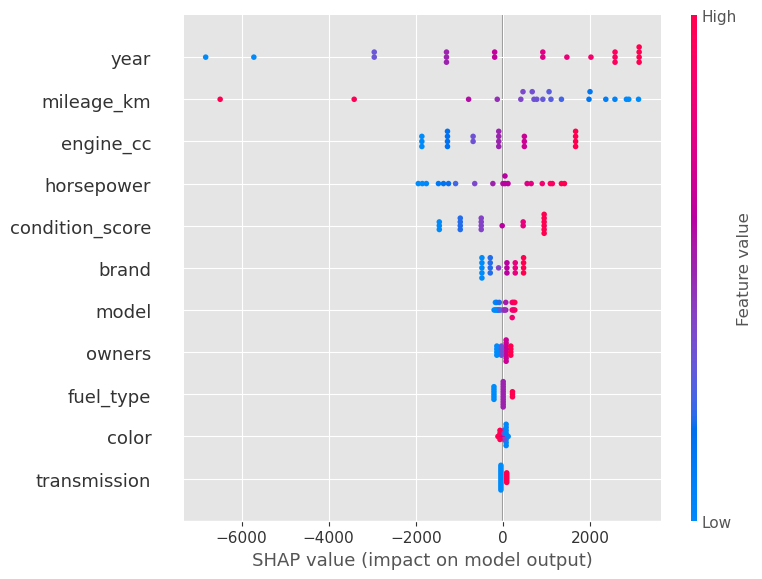

In [159]:
final_model = LinearRegression().fit(X_full, y_full)
explainer = shap.LinearExplainer(final_model, X_full)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

<h3 dir="rtl" align="right">
עיון בגרף מראה ששנת הייצור והקילומטראז' הם המנבאים החזקים ביותר בפער למול המאפיינים האחרים. ניתן לראות קשר לינארי: שנת ייצור מתקדמת (אדום) מעלה את המחיר, בעוד שקילומטראז' גבוה (אדום) מוריד את המחיר, מה שמעיד על כך שהמודל למד את הקשרים האמיתיים
 </h3></h3>

<h2 dir="rtl" align="right">
סיכום ומסקנות
</h2>

<h3 dir="rtl" style="text-align: right; font-weight: normal; line-height: 1.6; font-family: sans-serif;">
    לצורך הערכת ביצועי המודלים ובחירת המודל האופטימלי, בחרתי להשתמש במדד R² כמדד המרכזי להשוואה. 
    הסיבה העיקרית לבחירה היא היותו מדד מנורמל המייצג את אחוז השונות במחירי הרכבים (המשתנה הנבחן) שהמודל מסביר, מה שמאפשר השוואה הוגנת בין המודלים.
    <br><br>
    לאחר בחינת התוצאות, המודל שנבחר הוא Linear Regression, שכן הוא נמצא כיציב ביותר ובעל רמת ה - Overfitting הנמוכה ביותר בהשוואה למודל Random Forest. 
    <br><br>
    שיטת ההערכה המועדפת עליה התבססתי היא 10-Fold Cross Validation, כיוון שהיא סיפקה את ההערכה האמינה והעקבית ביותר, וצפתה בצורה הטובה ביותר את ביצועי המודל על נתוני ה Test. גם בעולם האמיתי, שיטה זו נחשבת לרוב לשיטה המועדפת מכיוון שהיא מספקת איזון טוב יותר בין הטיה לשונות והיא צורכת הרבה פחות משאבי מחשוב.
    <br><br>
    לסיכום, מדד ה-R² הסופי שהתקבל ב Test במודל ה Linear Regression בשיטת ה - 10-Fold Cross Validation הוא 0.41. 
אומנם מדד ה-R² הראה ירידה בביצועים לעומת ה Validation, אך ניתן להסבירה מנוכחותם של ערכי קצה ב Test, עליהם ניתן ללמוד מהפער שבין ה MAE לRMSE  בסט זה. גם הערכים של המדדים האחרים ירדו, מה שתומך במסקנה ומראה שהמודל למד ומתפקד טוב מול ערכים חדשים.
</h3>
